In [1]:
import urllib2
import csv, math
import time
import matplotlib as plt
%matplotlib inline
import numpy
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 6

plt.rc("savefig", dpi=500)

plt.rc('text', usetex=True)


plt.rc('text',usetex=True)
plt.rc('font',**{'family':'serif','serif':['Computer Modern']})
cols = ['#29A2C6','#FF6D31','#FFCB18','#73B66B','#EF597B', '#333333']

font = {'family' : 'serif',
        'weight' : 'bold'}

#### Semiempirical models of solar atmosphere I.: The quiet and active sun photosphere at moderate resolution. Fontenla et al.

Photospheric models derived from the observed visible and infrared continuum and from photospheric line radiation. (Model C: average quiet Sun)

In [2]:
h= [-9.684E+01,-8.684E+01,-7.684E+01,-6.684E+01,-5.684E+01,-4.684E+01,-3.684E+01,-2.684E+01,-1.684E+01,-6.841E+00,3.159E+00,1.316E+01,2.316E+01,3.816E+01, 5.316E+01,7.816E+01,1.032E+02,1.282E+02,1.532E+02,1.782E+02,2.032E+02,2.532E+02,3.032E+02,3.532E+02,4.032E+02]

In [3]:
hh = []
hh.append(0)
i=1
while i < len(h):
    hh.append(h[i]-h[i-1])
    i +=1

In [4]:
i=1
print h[i+1]-h[i]

10.0


In [5]:
width = []
k=0
while k < len(h)-1:
    width.append(h[k+1]-h[k])
    k +=1
width.append(50.0)
print len(width),len(h) ,width

25 25 [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.000000000000004, 10.0, 9.998999999999999, 10.0, 10.001000000000001, 10.0, 14.999999999999996, 15.0, 25.0, 25.040000000000006, 24.999999999999986, 25.0, 25.0, 25.0, 50.0, 50.0, 50.0, 50.0, 50.0]


In [6]:
n = [3.805E+15,2.927E+15,2.170E+15,1.509E+15,1.019E+15, 6.664E+14,4.255E+14,2.610E+14,1.552E+14,9.420E+13,6.153E+13,4.052E+13,2.701E+13,1.533E+13,8.365E+12,3.768E+12,1.777E+12,8.827E+11,4.586E+11,2.688E+11,1.727E+11,8.338E+10,4.356E+10,2.437E+10,1.439E+10]
print len(n)
rho=[]
j = 0
while j<len(n):
    rho.append(n[j]*1.66E-24)
    j += 1 

25


In [7]:
rho_he = []
i = 0
while i<len(n):
    rho_he.append(6.64e-24*n[i]/10)
    i += 1

In [8]:
rho_tot = []
i = 0
while i<len(n):
    rho_tot.append(rho[i]+rho_he[i])
    i += 1

#### Ingelman and Thunman model.

In [9]:
H=[]
i=-2000
while i <= 10000:
    H.append(i)
    i+=10

In [10]:
rho0 = 3.68e-7
rho0_bis=45.3e-7
h0 = 115.0
h02 = 622.0
h03 = 2835.0
rho_h = []
i = 0
for i in range(len(H)):
    if H[i]>0:
        a = rho0*numpy.exp(-H[i]/h0)
        rho_h.append(a)
        i+=1
    else:
        if H[i]<-2000:
            a = rho0_bis*numpy.exp(-H[i]/h03)
            rho_h.append(a)
            i+=1
        else:
            a = rho0*numpy.exp(-H[i]/h02)
            rho_h.append(a)
            i+=1


In [11]:
#### Extension of Ingelman model ####### 
H_ext=[]
i=-10000 #-10000
while i <= 100:
    H_ext.append(i)
    i+=10

In [12]:
#### Extension of Ingelman model ####### 
rho0 = 3.68e-7
rho0_bis=45.3e-7
h0 = 115.0
h02 = 622.0
h03 = 2835.0
R = 696e+3
rho_h_ext = []
i = 0
for i in range(len(H_ext)):
    if H_ext[i]>0:
        a = rho0*numpy.exp(-H_ext[i]/h0)
        rho_h_ext.append(a)
        i+=1
        i+=1
    else:
        if H_ext[i]<-2000:
            a = rho0_bis*numpy.exp(-float(H_ext[i])/h03)
            rho_h_ext.append(a)
            i+=1
        else:
            a = rho0*numpy.exp(-float(H_ext[i])/h02)
            rho_h_ext.append(a)
            i+=1
        
i = 0
r_R_ext = []
while i < len(H_ext):
    r_R_ext.append((R+H_ext[i]) / R)
    #print H_ext[i], (R+H_ext[i]) / R
    i+=1
rev_H_ext = list(reversed(r_R_ext))
#print rev_H_ext

#### BP2004

In [13]:
BP=urllib2.urlopen('http://www.sns.ias.edu/~jnb/SNdata/Export/BP2004/bp2004stdmodel.dat')
rho_bp = []
H_bp=[]
R = 696e+3
r_R_bp=[]
for line in BP:
    if '0.'  in line:
        columns = line.split( )
        #print line
        hhh = ((float(R))*(float(columns[1]))) - R
        H_bp.append(hhh)
        rho_bp.append(float(columns[3]))
        r_R_bp.append((R+hhh)/R)
#print list(reversed(H_bp))
#print list(reversed(r_R_bp)), len(rho_bp)

#### BS05_agsop

In [14]:
BS_05=urllib2.urlopen('http://www.sns.ias.edu/~jnb/SNdata/Export/BS2005/bs05_agsop.dat')
rho_bs05 = []
H_bs05=[]
R = 696e+3
r_R_bs05=[]
for line in BS_05:
    if '0.'  in line:
        columns = line.split( )
        #print line
        hhh = ((float(R))*(float(columns[1]))) - R
        H_bs05.append(hhh)
        rho_bs05.append(float(columns[3]))
        r_R_bs05.append((R+hhh)/R)
        
#print list(reversed(rho_bs05))
#print list(reversed(r_R_bs05)), len(rho_bs05)

#### Siess

In [15]:
siess=urllib2.urlopen('http://www.astro.ulb.ac.be/~siess/pmwiki/pub/Models/SUN/suny279a621nodiff.lst')
rho_siess=[]
H_siess=[]
i = 0
R = 696e+3
for line in siess:
    if  '.99'  in line:
        if 'r' in line:
            columns = line.split()
            i +=1
            
            rho_siess.append((float(columns[3])))
            h_siess = ((float(R))*(float(columns[1]))) - R
            H_siess.append(h_siess)
            #print ((float(R))*(float(columns[1]))),  float(columns[1])
    if '681r' in line: 
        break


#### Convection zone

In [16]:
H_conv=[0.3300e7,0.3693e7,0.4100e7,0.4520e7,0.4953e7,0.5399e7,0.5855e7,0.6321e7,0.6796e7,0.7280e7,0.7771e7,0.8276e7,0.8775e7,0.1139e8,0.1415e8,0.1703e8,0.2001e8,
        0.2309e8,0.2628e8,0.2956e8,0.3292e8,0.3641e8,0.3998e8,0.4364e8,0.4741e8,0.5127e8,0.5522e8,0.5928e8,0.6343e8,0.6769e8,0.7204e8,0.7650e8,
        0.8106e8,0.8573e8,0.9050e8,0.9539e8,0.1004e9,0.1055e9,0.1107e9,0.1161e9,0.1215e9,0.1271e9,0.1328e9,
        0.1508e9,0.2127e9,0.398e9,0.4683e9,0.6837e9,0.1015e10,0.1554e10,0.2427e10,0.3861e10,0.6216e10,0.9942e10,
        0.1551e11,0.189832e11]

rho_conv=[0.3345e-6,0.3314e-6,0.3276e-6,0.3246e-6,0.3226e-6,0.3217e-6,0.3219e-6,0.3228e-6,0.3244e-6,0.3265e-6,
          0.3290e-6,0.3319e-6,0.3352e-6,0.3554e-6,0.3809e-6,0.4109e-6,0.4454e-6,0.4838e-6,0.5262e-6,0.5732e-6,
          0.6249e-6,0.6820e-6,0.7447e-6,0.8139e-6,0.8899e-6,0.9735e-6,0.1066e-5,0.1167e-5,0.1278e-5,0.1400e-5,0.1535e-5,
          0.1682e-5,0.1844e-5,0.2023e-5,0.2219e-5,0.2434e-5,0.2669e-5,0.2928e-5,0.3212e-5,0.3523e-5,0.3864e-5,
          0.4239e-5,0.4649e-5,0.6131e-5,0.1397e-4,0.4078e-4,0.1142e-3,0.3045e-3,0.7546e-3,0.1812e-2,0.4329e-2,0.1003e-1,
          0.2286e-1,0.5238e-1,0.1201e0,0.1966e0]
i=0 
R = 696e+3
r_R_conv=[]
while i < len(H_conv):
    H_conv[i] =  -1* (H_conv[i] * 1e-5)
    r_R_conv.append((R+H_conv[i])/R)
    #print H_conv[i],(R+H_conv[i])/R
    i+=1
#print r_R_conv
i = 0
#print len(H_chrom), len(h_chrom), len(rho_chrom), len(width_chrom)
#print "Layer","Height(~above the",  "    ","Density(g cm^-3)"
#print "     photosphere)(km)"
#while i < len(H_conv):
#    print i, "      ", H_conv[i],"          ", rho_conv[i]
#    i +=1

#### Harvard Smithsonian model -  exp from Kotoku et al.

In [17]:
rho0harvard = 3.19e-7
h0harvard = 110.0
h02harvard = 400.0
rho_hharvard = []
i = 0
for i in range(len(H)):
    if H[i]>0:
        a = rho0*numpy.exp(-H[i]/h0)
        rho_hharvard.append(a)
        i+=1
    else:
        a = rho0*numpy.exp(-H[i]/h02)
        rho_hharvard.append(a)
        i+=1
#print len(H), len(rho_hharvard),(rho_hharvard)



#### Structure of the solar chromosphere III.: Models of the EUV brightness components of the quiet Sun (Model C: average quiet Sun)

Reference taken by Ingelman and Thunman.

In [18]:
h_modelC=[2543,2298,2290,2280,2274,
   2271,2267,2263,2255,2230,
   2200,2160,2129,2120,2115,
   2113,2109,2107,2104,2090,
   2080,2070,2050,2016,1990,
   1925,1785,1605,1515,1380,
   1280,1180,1065,980,905,
   855,755,705,655,605,
   555,515,450,350,250,
   150,100,50,0,-25,
   -50,-75]
nH_modelC=[1.005e9,3.205e9,5.041e9,9.038e9,1.201e10,
           1.378e10,1.567e10,1.718e10,1.797e10,1.862e10,
           1.932e10,2.051e10,2.163e10,2.231e10,2.403e10,
           2.732e10,4.092e10,4.673e10,5.239e10,6.127e10,
           6.541e10,6.960e10,7.705e10,9.075e10,1.033e11,
           1.380e11,2.601e11,6.386e11,1.048e12,2.273e12,
           4.200e12,7.865e12,1.711e13,3.147e13,5.546e13,
           8.135e13,1.864e14,2.935e14,4.794e14,8.119e14,
           1.382e15,2.096e15,3.989e15,9.979e15,2.315e16,
           4.917e16,6.866e16,9.203e16,1.166e17,1.261e17,
           1.317e17,1.365e17
           ]
rhoH_modelC=[]
#i=0
#while i < len(nH_modelC):
#    rhoH_modelC.append(nH_modelC[i]*1.66e-24)
#    i +=1
#print len(h_modelC), len(rhoH_modelC), nH_modelC
    

#### Semiempirical models of the solar atmosphere II. The quiet Sun low chromosphere at moderate resolution. Fontenla et al.

In [19]:
h_chrom=[2472,2425,2357,2263,2142,
         2013,1911,1801,1687,1571,
         1447,1319,1245,1180,1120,
         1060,1020,965,947,926,
         899.5,874.5,838,812,772,
         696,625,570,519,485,
         447.5,398,347,300,250,
         200,175,150,125,100,
         75,50,35,20,9.5,
         -0.7,-10,-20,-30,-40,
         -50,-60,-70,-80,-90,
         -100] # in km!
H_chrom=[]
j=0
while j<len(h_chrom):
    H_chrom.append((h_chrom[j])*1e5)
    j += 1
mass_col_chrom=[2.74e-6,3.96e-6,6.14e-6,1.02e-5,1.79e-5,
                3.10e-5,4.68e-5,7.28e-5,1.15e-4,1.83e-4,
                3.03e-4,5.08e-4,6.90e-4,9.03e-4,0.00117,
                0.00153,0.00185,0.00252,0.00282,0.00324,0.00390,
                0.00465,0.00603,0.00725,0.00966,0.0170,
                0.0292,0.0448,0.0674,0.0889,0.121,
                0.184,0.285,0.425,0.648,0.982,
                1.202,1.468,1.786,2.164,2.607,
                3.121,3.463,3.831,4.103,4.378,4.636,4.920,
                5.208,5.499,5.791,6.085,6.379,
                6.673,6.969,7.266]
rho_chrom=[]
i=0
while i < len(h_chrom):
    rho_chrom.append(mass_col_chrom[i]/((H_chrom[i])+150e5))
    i += 1
width_chrom = []
r_R_chrom=[]
k=0
R = 696e+3
while k < len(h_chrom)-1:
    width_chrom.append(h_chrom[k+1]-h_chrom[k])
    k +=1
l=0
while l < len(h_chrom):
    r_R_chrom.append((R+h_chrom[l])/R)
    l +=1
width_chrom.append(50.0)


#### Hybrid

In [20]:
H_hybrid=[2472
,2425
,2357
,2263
,2142
,2013
,1911
,1801
,1687
,1571
,1447
,1319
,1245
,1180
,1120
,1060
,1020
,965
,947
,926
,899.5
,874.5
,838
,812
,772
,696
,625
,570
,519
,485
,447.5
,398
,347
,300
,250
,200
,175
,150
,125
,100
,75
,50
,35
,20
,9.5
,-0.7
,-10
,-20
#,-30
#,-40
,-50, -60, -70, -80, -90, -100, -110, -120, -130, -140, -150, -160, -170, -180, -190, -200, -210, -220, -230, -240, -250, -260, -270, -280, -290, -300, -310, -320, -330, -340, -350, 
-364.1, -399.8, -436.40000000000003, -474.1, -512.7, -552.2, -592.8000000000001, -634.3000000000001, -676.9000000000001, -720.4000000000001, -765.0000000000001, -810.6, -857.3000000000001,
-905.0000000000001, -953.9000000000001, -1004.0000000000001, -1055.0, -1107.0, -1161.0, -1215.0, -1271.0, -1328.0, -1508.0000000000002, -2127.0, -3980.0000000000005, -4683.0, -6837.000000000001, 
-10150.0, -15540.000000000002, -24270.000000000004, -38610.0, -62160.00000000001,
-64721.04000000004, -65236.07999999996, -65751.12, -66280.08000000007, -66802.07999999996, -67338.0, -67873.92000000004, -68409.83999999997, -68952.71999999997, -69502.55999999994, 
-70052.40000000002, -70609.20000000007, -71166.0, -71729.76000000001, -72300.47999999998, -72871.19999999995, -73448.88, -74026.56000000006, -74618.16000000003, -75202.79999999993, 
-75801.35999999999, -76392.95999999996, -76998.47999999998, -77604.0, -78216.47999999998, -78828.95999999996, -79455.35999999999, -80074.80000000005, -80708.15999999992, -81341.52000000002, 
-81974.88, -82622.16000000003, -83269.43999999994, -83916.71999999997, -84577.91999999993, -85239.12, -85900.31999999995, -86575.43999999994, -87250.56000000006, -87925.68000000005, -88614.71999999997, 
-89303.76000000001, -89999.76000000001, -90695.76000000001, -91398.71999999997, -92108.64000000001, -92825.52000000002, -93542.40000000002, -94266.23999999999, -94990.08000000007, -95727.83999999997, -96465.59999999998, -97210.31999999995, -97955.04000000004, 
-98713.68000000005, -99472.32000000007, -100230.95999999996, -101003.52000000002, 
-101776.07999999996, -102555.59999999998, -103342.07999999996, -104128.56000000006, -104922.0, -105722.40000000002, -106529.76000000001, -107337.12, -108151.44000000006, -108972.71999999997, -109800.95999999996, -110629.20000000007, -111464.40000000002, -112306.55999999994, -113155.67999999993, -114011.76000000001, -114867.83999999997,
-115730.88, -116600.88, -117477.83999999997, -118354.80000000005, -119238.71999999997, -120129.59999999998, -121027.43999999994, -121925.28000000003, -122837.04000000004, -123748.79999999993, -124667.52000000002, -125586.23999999999, -126518.88, -127451.52000000002, -128391.12, -129337.68000000005, -130291.20000000007, -131251.67999999993, 
-132212.16000000003, -133179.59999999998, -134154.0, -135135.36, -136116.71999999997, -137112.0, -138107.28000000003, -139109.52000000002, -140118.7200000001, -141127.92000000004, -142151.04000000004, -143174.15999999992, -144204.24, -145241.28000000003, -146285.28000000003, -147336.24, -148387.19999999995, -149445.12, -150510.0, -151581.84000000008,
-152660.64, -153739.44000000006, -154832.16000000003, -155924.88, -157024.55999999994, -158131.19999999995, -159237.84000000008, -160358.40000000002, -161478.96000000008, -162606.47999999998, -163740.95999999996, -164882.40000000002, -166023.83999999997, -167179.19999999995, -168334.55999999994, -169496.88, -170666.16000000003, -171835.44000000006, -173018.63999999996, -174201.84000000003, -175392.0, -176589.11999999994, -177793.19999999995, -178997.27999999997, -180215.27999999997, -181433.28000000003, -182658.24, -183890.15999999997, -185122.08000000002, -186367.91999999998, -186869.03999999998, -187008.24, -187307.52000000002, -187620.71999999997, -187940.88, -188254.08000000002, -188567.28000000003, -188880.47999999998, -189200.63999999996, -189513.84000000003, -189834.00000000006, -190147.2, -190467.36, -190780.56, -191100.71999999997, -191420.88, -191741.04000000004, -192054.24, -192374.39999999997, -192694.56, -193014.72000000003, -193334.88, -193655.04000000004, -193982.16000000003, -194302.32, -194622.48000000004, -194942.63999999996, -195269.76, -195589.92000000004, -195910.07999999996, -196237.2, -196564.32, -196884.48000000004, -197211.59999999998, -197531.76, -197858.88, -198185.99999999994, -198513.12, -198840.24, -199160.40000000002, -199480.56, -199807.68, -200127.84000000003, -200448.0, -200775.12, -201102.24, -201422.39999999997, -201749.51999999996, -202069.68, -202396.8, -202723.92000000004, -203044.08000000002, -203371.2, -203698.32, -204025.43999999994, -204345.59999999998, -204672.72000000003, -204999.84000000003, -205326.96000000002, -205654.07999999996, -205981.2, -206308.32, -206635.44, -206962.56, -207289.68000000005, -207616.8, -207943.91999999998, -208278.0, -208605.12, -208932.24, -209259.36000000004, -209586.47999999998, -209920.56000000006, -210247.68, -210574.8, -210908.88, -211236.0, -211563.12, -211897.2, -212245.2, -213588.48000000004, -214910.88000000006, -216254.16000000003, -217590.47999999998, -218926.8, -220270.08000000002, -221613.36, -222956.63999999996, -224299.91999999998, -225643.2, -226993.44, -228343.68000000005, -229686.96000000002, -231037.19999999995, -232387.44, -233737.68, -235087.91999999998, -236438.15999999997, -237788.40000000002, -239138.63999999996, -240488.88, -241839.11999999994, -243189.36, -244539.60000000003, -245889.83999999997, -247240.08000000002, -248590.32, -249940.56000000006, -251290.8, -252641.04000000004, -253984.32, -255334.56, -256677.83999999997, -258028.08000000002, -259371.36, -260714.64, -262057.91999999998, -263401.19999999995, -264744.48000000004, -266080.8, -267424.07999999996, -268760.4, -270096.72000000003, -271433.04, -272769.36, -274105.68, -275435.04, -276771.36, -278100.72, -279430.07999999996, -280752.48, -282081.84, -283404.24000000005, -284726.63999999996, -286049.04, -287371.44, -288686.88, -290002.32, -291317.76, -292633.2, -293941.68, -295257.12000000005, -296565.60000000003, -297867.12, -299175.6, -300477.12, -301778.64, -303080.16, -304374.72000000003, -305669.28, -306963.83999999997, -308258.39999999997, -309546.0, -310833.6, -312121.2, -313408.80000000005, -314689.44, -315970.08, -317250.72000000003, -318524.4, -319805.04, -321071.76, -322345.44, -323612.16000000003, -324878.88, -326145.60000000003, -327412.31999999995, -328672.08, -329924.87999999995, -331184.64, -332437.43999999994, -333690.24, -334943.04, -336188.87999999995, -337434.72000000003, -338680.56, -339926.39999999997, -341165.27999999997, -342404.16, -343636.08, -344868.00000000006, -346099.92, -347331.84, -348556.8, -349781.76, -351006.72, -352231.68, -353449.68, -354660.72000000003, -355878.72, -357089.76, -358300.8, -359511.84, -360715.92, -361920.0, -363124.08, -364321.2, -365518.32, -366715.44, -367905.60000000003, -369102.72000000003, -370285.92, -371476.08, -372659.28, -373842.48, -375025.68, -376201.92, -377378.16000000003, -378554.4, -379723.68, -380892.96, -382062.24, -383231.52, -384393.84, -385556.16000000003, -386711.52, -387873.84, -389029.2, -390184.56, -391332.95999999996, -392481.36000000004, -393629.76, -394778.16, -395919.60000000003, -397061.04, -398195.52, -399336.96, -400471.44, -401605.92, -402733.44, -403860.96, -404988.48, -406116.0, -407236.56, -408364.07999999996, -409477.68, -410598.24, -411711.84, -412825.44, -413939.04, -415045.68, -416152.32, -417258.95999999996, -418358.64, -419465.27999999997, -420564.96, -421657.68, -422757.36, -423850.08, -424942.8, -426028.56, -427121.28, -428207.04, -429292.8, -430371.60000000003, -431450.4, -432529.2, -433608.0, -434686.8, -435758.64, -436830.48, -437895.36, -438967.19999999995, -440032.08, -441096.95999999996, -442154.88, -443219.76, -444277.68, -445335.6, -446386.56, -447444.48, -448495.44, -449546.4, -450590.4, -451634.4, -452678.4, -453722.4, -454766.4, -455803.44000000006, -456840.48, -457877.52, -458907.6, -459944.64, -460974.72, -462004.8, -463027.92, -464051.04000000004, -465074.16000000003, -466097.28, -467120.4, -468136.56, -469152.72, -470168.88, -471178.08, -472194.24, -473203.44, -474212.64, -475214.88, -476217.12, -477219.36, -478221.6, -479223.83999999997, -480219.12, -481214.4, -482202.72, -483198.0, -484186.32, -485174.64, -486156.0, -487137.36, -488118.72, -489100.08, -490074.48, -491048.88, -492016.32, -492983.76, -493951.2, -494911.68, -495872.16, -496832.64, -497786.16000000003, -498732.72, -499679.28, -500618.88, -501558.48, -502498.08, -503430.72, -504356.4, -505282.08, -506200.8, -507112.56, -508024.32, -508936.07999999996, -509840.88, -510738.72, -511636.56, -512527.44, -513418.32, -514302.24, -515186.16, -516063.12, -516940.07999999996, -517810.07999999996, -518673.12, -519536.16000000003, -520399.19999999995, -521255.28, -522104.4, -522953.52, -523795.68, -524637.84, -525473.04, -526301.28, -527129.52, -527950.8, -528772.08, -529586.4, -530400.72, -531201.12, -532001.52, -532801.92, -533595.36, -534381.84, -535168.3200000001, -535940.88, -536720.4, -537486.0, -538251.6, -539010.24, -539768.88, -540513.6, -541258.3200000001, -542003.04, -542733.84, -543464.64, -544195.44, -544912.3200000001, -545629.2, -546339.12, -547049.04, -547752.0, -548448.0, -549137.04, -549826.08, -550501.2, -551183.28, -551851.44, -552519.6, -553180.8, -553842.0, -554489.28, -555136.56, -555783.84, -556417.2, -557050.56, -557683.92, -558303.36, -558922.8, -559542.24, -560147.76, -560753.28, -561358.8, -561950.4, -562542.0, -563133.6, -563711.28, -564295.9199999999, -564866.64, -565437.36, -566001.12, -566564.88, -567121.6799999999, -567671.52, -568221.36, -568771.2, -569307.12, -569843.04, -570378.96, -570907.92, -571429.92, -571951.92, -572473.92, -572982.0, -573497.04, -573998.16, -574506.24, -575000.4, -575501.52, -575988.72, -576475.92, -576963.12, -577443.36, -577923.6, -578403.84, -578870.16, -579343.44, -579809.76, -580269.12, -580728.48, -581187.84, -581640.24, -582092.64, -582538.08, -582983.52, -583428.96, -583867.44, -584305.92, -584737.44, -585168.96, -585600.48, -586025.04, -586449.6, -586867.2, -587291.76, -587709.36, -588120.0, -588530.64, -588941.28, -589351.92, -589755.6, -590159.28, -590556.0, -590952.72, -591349.44, -591746.16, -592135.92, -592525.68, -592915.44, -593305.2, -593688.0, -594070.8, -594446.64, -594829.44, -595205.28, -595581.12, -595950.0, -596318.88, -596687.76, -597056.64, -597425.52, -597787.44, -598149.36, -598511.28, -598866.24, -599228.16, -599583.12, -599938.08, -600286.08, -600641.04, -600989.04, -601337.04, -601685.04, -602026.08, -602374.08, -602715.12, -603056.16, -603390.24, -603731.28, -604065.36, -604406.4, -604740.48, -605067.6, -605401.6799999999, -605728.8, -606062.88, -606390.0, -606717.12, -607037.28, -607364.4, -607684.56, -608011.6799999999, -608331.84, -608652.0, -608965.2, -609285.36, -609598.56, -609918.72, -610231.92, -610545.12, -610858.3200000001, -611171.52, -611477.76, -611790.96, -612097.2, -612403.44, -612709.68, -613015.92, -613322.16, -613628.4, -613927.68, -614226.96, -614533.2, -614832.48, -615131.76, -615431.04, -615730.32, -616029.6, -616321.92, -616621.2, -616913.52, -617205.84, -617505.12, -617797.44, -618089.76, -618382.08, -618674.4, -618959.76, -619252.08, -619544.4, -619829.76, -620115.12, -620407.44, -620692.8, -620978.16, -621263.52, -621548.88, -621834.24, -622119.6, -622398.0, -622683.36, -622968.72, -623247.12, -623525.52, -623810.88, -624089.28, -624367.68, -624653.04, -624931.44, -625209.84, -625488.24, -625766.64, -626038.08, -626316.48, -626594.88, -626873.28, -627144.72, -627423.12, -627701.52, -627972.96, -628244.4, -628522.8, -628794.24, -629072.64, -629344.08, -629615.52, -629886.96, -630158.4, -630429.84, -630708.24, -630979.68, -631251.12, -631522.56, -631787.04, -632058.48, -632329.92, -632601.36, -632872.8, -633144.24, -633408.72, -633680.16, -633951.6, -634223.04, -634487.52, -634758.96, -635030.4, -635294.88, -635566.32, -635830.8, -636102.24, -636373.68, -636638.16, -636909.6, -637174.08, -637445.52, -637710.0, -637981.44, -638245.92, -638517.36, -638781.84, -639046.32, -639317.76, -639582.24, -639853.6799999999, -640118.16, -640389.6, -640654.08, -640925.52, -641190.0, -641461.44, -641725.92, -641997.36, -642261.84, -642533.28, -642797.76, -643069.2, -643333.68, -643605.12, -643869.6, -644141.04, -644412.48, -644676.96, -644948.4, -645219.84, -645484.32, -645755.76, -646027.2, -646291.68, -646563.12, -646834.56, -647106.0, -647370.48, -647641.92, -647913.36, -648184.8, -648456.24, -648727.68, -648999.12, -649270.56, -649542.0, -649813.44, -650084.88, -650356.32, -650627.76, -650906.16, -651177.6, -651449.04, -651720.48, -651998.88, -652270.32, -652541.76, -652820.16, -653091.6, -653370.0, -653641.44, -653919.84, -654191.28, -654469.68, -654748.08, -655019.52, -655297.92, -655576.32, -655854.72, -656133.12, -656411.52, -656682.96, -656961.36, -657239.76, -657518.16, -657796.56, -658081.92, -658360.32, -658638.72, -658917.12, -659195.52, -659473.92, -659759.28, -660037.68, -660316.08, -660601.44, -660879.84, -661158.24, -661443.6, -661722.0, -662007.36, -662285.76, -662564.16, -662849.52, -663127.92, -663413.28, -663691.68, -663977.04, -664255.44, -664533.84, -664819.2, -665097.6, -665382.96, -665661.36, -665939.76, -666225.12, -666503.52, -666781.92, -667060.32, -667345.68, -667624.08, -667902.48, -668180.88, -668459.28, -668737.68, -669009.12, -669287.52, -669565.92, -669837.36, -670115.76, -670387.2, -670658.64, -670930.08, -671201.52, -671472.96, -671744.4, -672015.84, -672280.32, -672551.76, -672816.24, -673080.72, -673345.2, -673602.72, -673867.2, -674124.72, -674389.2, -674646.72, -674897.28, -675154.8, -675405.36, -675655.92, -675906.48, -676157.04, -676407.6, -676651.2, -676894.8, -677138.4, -677375.04, -677611.68, -677848.32, -678084.96, -678321.6, -678551.28, -678780.96, -679003.68, -679233.36, -679456.08, -679678.8, -679894.56, -680110.32, -680326.08, -680541.84, -680750.64, -680959.44, -681168.24, -681370.08, -681571.92, -681773.76, -681968.64, -682170.48, -682358.4, -682553.28, -682741.2, -682929.12, -683117.04, -683298.0, -683478.96, -683659.92, -683833.92, -684007.92, -684181.92, -684348.96, -684522.96, -684683.04, -684850.08, -685010.16, -685170.24, -685330.32, -685483.44, -685636.56, -685789.68, -685942.8, -686088.96, -686235.12, -686374.32, -686520.48, -686659.68, -686798.88, -686931.12, -687070.32, -687202.56, -687327.84, -687460.08, -687585.36, -687710.64, -687835.92, -687954.24, -688072.56, -688190.88, -688309.2, -688427.52, -688538.88, -688650.24, -688761.6, -688866.0, -688977.36, -689081.76, -689186.16, -689290.56, -689388.0, -689485.44, -689582.88, -689680.32, -689777.76, -689868.24, -689965.68, -690056.16, -690146.64, -690230.16, -690320.64, -690404.16, -690487.68, -690571.2, -690654.72, -690738.24, -690814.8, -690891.36, -690967.92, -691044.48, -691121.04, -691197.6, -691267.2, -691336.8, -691413.36, -691482.96]
rho_hybrid=[1.04500381388e-14
,1.53786407767e-14
,2.44914240128e-14
,4.22710319105e-14
,7.80977312391e-14
,1.43319463708e-13
,2.27074235808e-13
,3.73141978473e-13
,6.26020685901e-13
,1.06333527019e-12
,1.89730745147e-12
,3.45813478557e-12
,4.94623655914e-12
,6.78947368421e-12
,9.2125984252e-12
,1.26446280992e-11
,1.5811965812e-11
,2.2600896861e-11
,2.57064721969e-11
,3.01115241636e-11
,3.71605526441e-11
,4.53879941435e-11
,6.1032388664e-11
,7.53638253638e-11
,1.04772234273e-10
,2.00945626478e-10
,3.76774193548e-10
,6.22222222222e-10
,1.00747384155e-09
,1.4e-09
,2.02510460251e-09
,3.35766423358e-09
,5.73440643863e-09
,9.44444444444e-09
,1.62e-08
,2.80571428571e-08
,3.69846153846e-08
,4.89333333333e-08
,6.49454545455e-08
,8.656e-08
,1.15866666667e-07
,1.5605e-07
,1.87189189189e-07
,2.25352941176e-07
,2.5724137931e-07
,2.9323509712e-07
,3.31142857143e-07
,3.78461538462e-07
#,4.34e-07
#,4.99909090909e-07
,3.9880349038118061e-07, 4.0526693982883533e-07, 4.1183514307070192e-07, 4.1850979786236611e-07, 4.2529262947511378e-07, 4.3218539114188148e-07, 4.3918986451043316e-07, 4.4630786010388266e-07, 4.535412177886792e-07, 4.6089180725017815e-07, 4.6836152847591878e-07, 4.7595231224673518e-07, 4.8366612063582618e-07, 4.9150494751591424e-07, 4.9947081907462325e-07, 5.0756579433820948e-07, 5.1579196570378133e-07, 5.2415145948014305e-07, 5.3264643643740653e-07, 5.4127909236550782e-07, 5.5005165864177835e-07, 5.5896640280771236e-07, 5.6802562915508423e-07, 5.7723167932156345e-07, 5.8658693289598367e-07, 5.9609380803342083e-07, 6.057547620802408e-07, 6.1557229220927627e-07, 6.2554893606529845e-07, 6.3568727242095007e-07, 6.4598992184330887e-07,
6.82e-07, 7.447e-07, 8.139e-07, 8.899e-07, 9.735e-07, 1.066e-06, 1.167e-06, 1.278e-06, 1.4e-06, 1.535e-06, 1.682e-06, 1.844e-06, 2.023e-06, 2.219e-06, 2.434e-06, 2.669e-06, 2.928e-06, 3.212e-06, 3.523e-06, 3.864e-06, 4.239e-06, 4.649e-06, 6.131e-06, 1.397e-05, 4.078e-05, 0.0001142, 0.0003045, 0.0007546, 0.001812, 0.004329, 0.01003, 0.02286,
0.02285, 0.02316, 0.02349, 0.02381, 0.02414, 0.02448, 0.02482, 0.02516, 0.02551, 0.02586, 0.02622, 0.02658, 0.02695, 0.02733, 0.0277, 0.02809, 0.02848, 0.02887, 0.02927, 0.02968, 0.03009, 0.03051, 0.03093, 0.03136, 0.03179, 0.03223, 0.03268, 0.03313, 0.03359, 0.03406, 0.03453, 0.03501, 0.03549, 0.03599, 0.03649, 0.03699, 0.0375, 0.03802, 0.03855, 0.03908, 0.03963, 0.04018, 0.04073, 0.0413, 0.04187, 0.04245, 0.04304, 0.04363, 0.04424, 0.04485, 0.04547, 0.0461, 0.04674, 0.04739, 0.04805, 0.04871, 0.04939, 0.05007, 0.05077, 0.05147, 0.05218, 0.05291, 0.05364, 0.05438, 0.05514, 0.0559, 0.05668, 0.05746, 0.05826, 0.05906, 0.05988, 0.06071, 0.06155, 0.06241, 0.06327, 0.06415, 0.06504, 0.06594, 0.06685, 0.06778, 0.06872, 0.06967, 0.07063, 0.07161, 0.0726, 0.07361, 0.07463, 0.07566, 0.07671, 0.07777, 0.07885, 0.07994, 0.08105, 0.08217, 0.08331, 0.08447, 0.08564, 0.08682, 0.08802, 0.08924, 0.09048, 0.09173, 0.093, 0.09429, 0.0956, 0.09692, 0.09826, 0.09962, 0.101, 0.1024, 0.1038, 0.1053, 0.1067, 0.1082, 0.1097, 0.1112, 0.1127, 0.1143, 0.1159, 0.1175, 0.1191, 0.1208, 0.1224, 0.1241, 0.1258, 0.1276, 0.1293, 0.1311, 0.1329, 0.1348, 0.1366, 0.1385, 0.1404, 0.1424, 0.1443, 0.1463, 0.1484, 0.1504, 0.1525, 0.1546, 0.1567, 0.1589, 0.1611, 0.162, 0.1622, 0.1628, 0.1633, 0.1639, 0.1645, 0.165, 0.1656, 0.1662, 0.1668, 0.1673, 0.1679, 0.1685, 0.1691, 0.1697, 0.1702, 0.1708, 0.1714, 0.172, 0.1726, 0.1732, 0.1738, 0.1744, 0.175, 0.1756, 0.1762, 0.1768, 0.1774, 0.178, 0.1787, 0.1793, 0.1799, 0.1805, 0.1811, 0.1818, 0.1824, 0.183, 0.1837, 0.1843, 0.185, 0.1857, 0.1863, 0.187, 0.1877, 0.1884, 0.1891, 0.1898, 0.1905, 0.1912, 0.1919, 0.1927, 0.1934, 0.1941, 0.1949, 0.1956, 0.1963, 0.1971, 0.1978, 0.1986, 0.1994, 0.2001, 0.2009, 0.2017, 0.2025, 0.2033, 0.204, 0.2048, 0.2056, 0.2064, 0.2073, 0.2081, 0.2089, 0.2097, 0.2105, 0.2114, 0.2122, 0.2131, 0.2139, 0.2148, 0.2157, 0.2192, 0.2228, 0.2264, 0.2302, 0.234, 0.2379, 0.2419, 0.2459, 0.2501, 0.2543, 0.2586, 0.263, 0.2675, 0.272, 0.2767, 0.2815, 0.2863, 0.2913, 0.2963, 0.3014, 0.3067, 0.312, 0.3175, 0.323, 0.3287, 0.3345, 0.3404, 0.3463, 0.3525, 0.3587, 0.365, 0.3715, 0.3781, 0.3848, 0.3917, 0.3987, 0.4058, 0.413, 0.4204, 0.4279, 0.4356, 0.4434, 0.4514, 0.4595, 0.4678, 0.4762, 0.4848, 0.4935, 0.5025, 0.5115, 0.5208, 0.5302, 0.5398, 0.5496, 0.5596, 0.5697, 0.5801, 0.5906, 0.6014, 0.6123, 0.6234, 0.6348, 0.6464, 0.6581, 0.6701, 0.6824, 0.6948, 0.7075, 0.7204, 0.7336, 0.747, 0.7606, 0.7745, 0.7886, 0.8031, 0.8177, 0.8327, 0.8479, 0.8634, 0.8792, 0.8953, 0.9117, 0.9283, 0.9453, 0.9626, 0.9802, 0.9982, 1.016, 1.035, 1.054, 1.073, 1.093, 1.113, 1.133, 1.154, 1.175, 1.197, 1.218, 1.241, 1.263, 1.286, 1.31, 1.334, 1.358, 1.383, 1.408, 1.434, 1.46, 1.487, 1.514, 1.541, 1.57, 1.598, 1.627, 1.657, 1.687, 1.718, 1.749, 1.781, 1.813, 1.846, 1.88, 1.914, 1.948, 1.984, 2.02, 2.056, 2.093, 2.131, 2.17, 2.209, 2.249, 2.29, 2.331, 2.373, 2.416, 2.46, 2.504, 2.549, 2.595, 2.642, 2.689, 2.737, 2.786, 2.836, 2.887, 2.939, 2.992, 3.045, 3.1, 3.155, 3.211, 3.269, 3.327, 3.386, 3.447, 3.508, 3.57, 3.634, 3.698, 3.764, 3.83, 3.898, 3.967, 4.037, 4.108, 4.181, 4.255, 4.33, 4.406, 4.483, 4.562, 4.642, 4.723, 4.806, 4.89, 4.975, 5.062, 5.15, 5.24, 5.331, 5.424, 5.518, 5.614, 5.711, 5.809, 5.91, 6.012, 6.115, 6.221, 6.327, 6.436, 6.546, 6.658, 6.772, 6.888, 7.005, 7.124, 7.245, 7.368, 7.493, 7.62, 7.748, 7.879, 8.012, 8.146, 8.283, 8.422, 8.563, 8.706, 8.851, 8.998, 9.147, 9.299, 9.453, 9.609, 9.767, 9.928, 10.09, 10.26, 10.42, 10.59, 10.77, 10.94, 11.12, 11.3, 11.48, 11.66, 11.85, 12.04, 12.23, 12.42, 12.62, 12.82, 13.02, 13.23, 13.43, 13.64, 13.85, 14.07, 14.28, 14.5, 14.72, 14.94, 15.17, 15.39, 15.62, 15.86, 16.09, 16.32, 16.56, 16.8, 17.04, 17.29, 17.53, 17.78, 18.03, 18.29, 18.54, 18.8, 19.06, 19.32, 19.58, 19.85, 20.11, 20.38, 20.65, 20.93, 21.2, 21.48, 21.76, 22.04, 22.32, 22.6, 22.89, 23.18, 23.46, 23.75, 24.05, 24.34, 24.63, 24.93, 25.23, 25.53, 25.83, 26.13, 26.43, 26.73, 27.04, 27.34, 27.65, 27.95, 28.26, 28.57, 28.88, 29.19, 29.5, 29.81, 30.12, 30.44, 30.75, 31.06, 31.38, 31.69, 32.01, 32.32, 32.64, 32.95, 33.27, 33.58, 33.9, 34.21, 34.53, 34.85, 35.16, 35.48, 35.79, 36.11, 36.42, 36.74, 37.06, 37.37, 37.69, 38.0, 38.32, 38.63, 38.94, 39.26, 39.57, 39.88, 40.2, 40.51, 40.82, 41.13, 41.45, 41.76, 42.07, 42.38, 42.69, 43.0, 43.31, 43.61, 43.92, 44.23, 44.54, 44.84, 45.15, 45.46, 45.76, 46.07, 46.37, 46.68, 46.98, 47.28, 47.59, 47.89, 48.19, 48.49, 48.79, 49.09, 49.39, 49.69, 49.99, 50.29, 50.59, 50.89, 51.19, 51.48, 51.78, 52.08, 52.37, 52.67, 52.96, 53.26, 53.55, 53.85, 54.14, 54.44, 54.73, 55.02, 55.32, 55.61, 55.9, 56.19, 56.48, 56.78, 57.07, 57.36, 57.65, 57.94, 58.23, 58.52, 58.81, 59.1, 59.39, 59.67, 59.96, 60.25, 60.54, 60.83, 61.11, 61.4, 61.69, 61.98, 62.26, 62.55, 62.84, 63.12, 63.41, 63.7, 63.98, 64.27, 64.55, 64.84, 65.13, 65.41, 65.7, 65.98, 66.27, 66.55, 66.84, 67.12, 67.41, 67.69, 67.98, 68.26, 68.54, 68.83, 69.11, 69.4, 69.68, 69.97, 70.25, 70.54, 70.82, 71.11, 71.39, 71.68, 71.96, 72.24, 72.53, 72.81, 73.1, 73.38, 73.67, 73.95, 74.24, 74.52, 74.81, 75.1, 75.38, 75.67, 75.95, 76.24, 76.52, 76.81, 77.1, 77.38, 77.67, 77.96, 78.24, 78.53, 78.82, 79.11, 79.39, 79.68, 79.97, 80.26, 80.55, 80.84, 81.12, 81.41, 81.7, 81.99, 82.28, 82.57, 82.86, 83.15, 83.44, 83.74, 84.03, 84.32, 84.61, 84.9, 85.2, 85.49, 85.78, 86.08, 86.37, 86.66, 86.96, 87.25, 87.55, 87.84, 88.14, 88.44, 88.73, 89.03, 89.33, 89.62, 89.92, 90.22, 90.52, 90.82, 91.12, 91.42, 91.72, 92.02, 92.32, 92.62, 92.92, 93.22, 93.53, 93.83, 94.13, 94.44, 94.74, 95.05, 95.35, 95.66, 95.96, 96.27, 96.58, 96.89, 97.19, 97.5, 97.81, 98.12, 98.43, 98.74, 99.05, 99.36, 99.67, 99.99, 100.3, 100.6, 100.9, 101.2, 101.6, 101.9, 102.2, 102.5, 102.8, 103.1, 103.5, 103.8, 104.1, 104.4, 104.7, 105.0, 105.4, 105.7, 106.0, 106.3, 106.7, 107.0, 107.3, 107.6, 107.9, 108.3, 108.6, 108.9, 109.2, 109.6, 109.9, 110.2, 110.6, 110.9, 111.2, 111.5, 111.9, 112.2, 112.5, 112.9, 113.2, 113.5, 113.9, 114.2, 114.5, 114.9, 115.2, 115.5, 115.9, 116.2, 116.5, 116.9, 117.2, 117.5, 117.9, 118.2, 118.5, 118.9, 119.2, 119.5, 119.9, 120.2, 120.6, 120.9, 121.2, 121.6, 121.9, 122.2, 122.6, 122.9, 123.3, 123.6, 123.9, 124.3, 124.6, 124.9, 125.3, 125.6, 126.0, 126.3, 126.6, 127.0, 127.3, 127.6, 128.0, 128.3, 128.6, 129.0, 129.3, 129.6, 129.9, 130.3, 130.6, 130.9, 131.2, 131.6, 131.9, 132.2, 132.5, 132.9, 133.2, 133.5, 133.8, 134.1, 134.4, 134.7, 135.1, 135.4, 135.7, 136.0, 136.3, 136.6, 136.9, 137.2, 137.5, 137.8, 138.0, 138.3, 138.6, 138.9, 139.2, 139.5, 139.7, 140.0, 140.3, 140.5, 140.8, 141.1, 141.3, 141.6, 141.8, 142.1, 142.3, 142.6, 142.8, 143.0, 143.3, 143.5, 143.7, 144.0, 144.2, 144.4, 144.6, 144.8, 145.0, 145.2, 145.4, 145.6, 145.8, 146.0, 146.2, 146.4, 146.6, 146.7, 146.9, 147.1, 147.2, 147.4, 147.6, 147.7, 147.9, 148.0, 148.2, 148.3, 148.5, 148.6, 148.7, 148.9, 149.0, 149.1, 149.2, 149.4, 149.5, 149.6, 149.7, 149.8, 149.9, 150.0, 150.1, 150.2, 150.3, 150.4, 150.5, 150.6, 150.7, 150.8, 150.8, 150.9, 151.0, 151.1, 151.1, 151.2, 151.3, 151.4, 151.4, 151.5, 151.5, 151.6, 151.7, 151.7, 151.8, 151.8, 151.9, 151.9, 152.0, 152.0, 152.1, 152.1, 152.2, 152.2, 152.3, 152.3, 152.3, 152.4, 152.4, 152.5, 152.5, 152.5, 152.6, 152.6, 152.6, 152.7, 152.7, 152.7, 152.7, 152.8, 152.8, 152.8, 152.8, 152.9, 152.9, 152.9, 152.9, 153.0, 153.0, 153.0, 153.0, 153.0, 153.1, 153.1, 153.1, 153.1, 153.1, 153.1]
r_R=[1.00355172414
,1.0034841954
,1.00338649425
,1.00325143678
,1.00307758621
,1.00289224138
,1.00274568966
,1.00258764368
,1.00242385057
,1.00225718391
,1.00207902299
,1.00189511494
,1.0017887931
,1.0016954023
,1.0016091954
,1.00152298851
,1.00146551724
,1.00138649425
,1.00136063218
,1.00133045977
,1.00129238506
,1.00125646552
,1.00120402299
,1.00116666667
,1.0011091954
,1.001
,1.00089798851
,1.00081896552
,1.00074568966
,1.00069683908
,1.00064295977
,1.00057183908
,1.00049856322
,1.00043103448
,1.0003591954
,1.00028735632
,1.00025143678
,1.00021551724
,1.0001795977
,1.00014367816
,1.00010775862
,1.00007183908
,1.00005028736
,1.00002873563
,1.00001364943
,0.999998994253
,0.999985632184
,0.999971264368
#,0.999956896552
#,0.999942528736
#,0.9999281609195402, 
,0.9999137931034483, 0.9998994252873563, 0.9998850574712643, 0.9998706896551725, 0.9998563218390805, 0.9998419540229885, 0.9998275862068966, 0.9998132183908046, 0.9997988505747126, 0.9997844827586206, 0.9997701149425288, 0.9997557471264368, 0.9997413793103448, 0.9997270114942529, 0.9997126436781609, 0.9996982758620689, 0.9996839080459771, 0.9996695402298851, 0.9996551724137931, 0.9996408045977011, 0.9996264367816092, 0.9996120689655172, 0.9995977011494253, 0.9995833333333334, 0.9995689655172414, 0.9995545977011494, 0.9995402298850574, 0.9995258620689655, 0.9995114942528736, 0.9994971264367816, 
0.999476867816092, 0.9994255747126436, 0.9993729885057471, 0.9993188218390805, 0.9992633620689656, 0.9992066091954024, 0.9991482758620689, 0.9990886494252873, 0.9990274425287357, 0.9989649425287356, 0.9989008620689656, 0.9988353448275863, 0.9987682471264367, 0.9986997126436782, 0.9986294540229885, 0.9985574712643678, 0.9984841954022988, 0.9984094827586207, 0.9983318965517242, 0.9982543103448276, 0.9981738505747126, 0.9980919540229886, 0.9978333333333333, 0.9969439655172414, 0.9942816091954023, 0.993271551724138, 0.990176724137931, 0.9854166666666667, 0.9776724137931034, 0.9651293103448276, 0.9445258620689655, 0.9106896551724138,
0.90775, 0.90701, 0.90627, 0.9055300000000001, 0.9047699999999999, 0.90402, 0.90325, 0.90248, 0.90171, 0.90093, 0.90014, 0.89935, 0.8985499999999998, 0.89775, 0.89694, 0.89612, 0.8953000000000001, 0.89447, 0.8936399999999999, 0.89279, 0.8919500000000001, 0.89109, 0.89024, 0.88937, 0.8885, 0.8876200000000001, 0.8867400000000001, 0.8858400000000001, 0.8849499999999999, 0.8840400000000002, 0.88313, 0.88222, 0.8812899999999999, 0.88036, 0.87943, 0.8784800000000001, 0.87753, 0.87658, 0.8756100000000001, 0.87464, 0.87367, 0.87268, 0.87169, 0.87069, 0.86969, 0.86868, 0.86766, 0.86663, 0.8655999999999999, 0.86456, 0.8635199999999998, 0.86246, 0.8614, 0.86033, 0.8592599999999999, 0.8581699999999999, 0.85708, 0.85599, 0.85488, 0.85377, 0.85265, 0.85152, 0.8503899999999999, 0.84925, 0.8481, 0.84694, 0.84578, 0.8446099999999999, 0.84343, 0.8422400000000001, 0.8410499999999999, 0.83985, 0.83864, 0.83742, 0.83619, 0.83496, 0.83372, 0.83247, 0.83121, 0.82995, 0.8286800000000001, 0.8274, 0.8261100000000001, 0.82482, 0.82351, 0.8222000000000002, 0.8208799999999999, 0.8195600000000001, 0.81822, 0.8168799999999999, 0.81553, 0.81417, 0.8127999999999999, 0.8114200000000001, 0.81004, 0.80865, 0.80725, 0.80584, 0.8044300000000001, 0.803, 0.80157, 0.80013, 0.7986799999999998, 0.79723, 0.7957599999999999, 0.7942900000000002, 0.79281, 0.7913199999999999, 0.78982, 0.7883100000000001, 0.7868, 0.78528, 0.78375, 0.7822099999999998, 0.78066, 0.7791099999999999, 0.7775399999999999, 0.77597, 0.7743900000000001, 0.7728, 0.7712099999999998, 0.7696, 0.7679899999999998, 0.76637, 0.7647400000000001, 0.7631, 0.76146, 0.7598, 0.75814, 0.75647, 0.75479, 0.75311, 0.75141, 0.74971, 0.748, 0.74628, 0.74455, 0.74282, 0.74107, 0.73932, 0.73756, 0.73579, 0.73402, 0.73223, 0.73151, 0.73131, 0.73088, 0.73043, 0.72997, 0.72952, 0.72907, 0.72862, 0.72816, 0.72771, 0.72725, 0.7268, 0.72634, 0.72589, 0.72543, 0.72497, 0.72451, 0.72406, 0.7236, 0.72314, 0.72268, 0.72222, 0.72176, 0.72129, 0.72083, 0.72037, 0.71991, 0.71944, 0.71898, 0.71852, 0.71805, 0.71758, 0.71712, 0.71665, 0.71619, 0.71572, 0.71525, 0.71478, 0.71431, 0.71385, 0.71339, 0.71292, 0.71246, 0.712, 0.71153, 0.71106, 0.7106, 0.71013, 0.70967, 0.7092, 0.70873, 0.70827, 0.7078, 0.70733, 0.70686, 0.7064, 0.70593, 0.70546, 0.70499, 0.70452, 0.70405, 0.70358, 0.70311, 0.70264, 0.70217, 0.7017, 0.70123, 0.70075, 0.70028, 0.69981, 0.69934, 0.69887, 0.69839, 0.69792, 0.69745, 0.69697, 0.6965, 0.69603, 0.69555, 0.69505, 0.69312, 0.69122, 0.68929, 0.68737, 0.68545, 0.68352, 0.68159, 0.67966, 0.67773, 0.6758, 0.67386, 0.67192, 0.66999, 0.66805, 0.66611, 0.66417, 0.66223, 0.66029, 0.65835, 0.65641, 0.65447, 0.65253, 0.65059, 0.64865, 0.64671, 0.64477, 0.64283, 0.64089, 0.63895, 0.63701, 0.63508, 0.63314, 0.63121, 0.62927, 0.62734, 0.62541, 0.62348, 0.62155, 0.61962, 0.6177, 0.61577, 0.61385, 0.61193, 0.61001, 0.60809, 0.60617, 0.60426, 0.60234, 0.60043, 0.59852, 0.59662, 0.59471, 0.59281, 0.59091, 0.58901, 0.58711, 0.58522, 0.58333, 0.58144, 0.57955, 0.57767, 0.57578, 0.5739, 0.57203, 0.57015, 0.56828, 0.56641, 0.56454, 0.56268, 0.56082, 0.55896, 0.5571, 0.55525, 0.5534, 0.55155, 0.5497, 0.54786, 0.54602, 0.54418, 0.54235, 0.54051, 0.53869, 0.53686, 0.53504, 0.53322, 0.5314, 0.52958, 0.52777, 0.52597, 0.52416, 0.52236, 0.52056, 0.51876, 0.51697, 0.51518, 0.51339, 0.5116, 0.50982, 0.50804, 0.50627, 0.5045, 0.50273, 0.50096, 0.49920000000000003, 0.49744, 0.49568000000000006, 0.49392, 0.49217, 0.49043, 0.48868000000000006, 0.48694, 0.4852, 0.48345999999999995, 0.48173000000000005, 0.48, 0.47827, 0.47655, 0.47483, 0.47311, 0.47139999999999993, 0.46967999999999993, 0.46798, 0.46626999999999996, 0.46457, 0.46287, 0.46117, 0.45948, 0.45779, 0.45609999999999995, 0.45442, 0.45274, 0.45106, 0.44937999999999995, 0.44770999999999994, 0.44603999999999994, 0.44438, 0.44270999999999994, 0.44105, 0.43939, 0.4377400000000001, 0.4360899999999999, 0.43444, 0.43279000000000006, 0.4311499999999999, 0.42951, 0.42788, 0.42623999999999995, 0.42461, 0.42298, 0.42136, 0.41973999999999995, 0.41812000000000005, 0.4165, 0.41489, 0.4132700000000001, 0.41167000000000004, 0.41006000000000004, 0.40846, 0.40686, 0.40526, 0.40367000000000003, 0.40208, 0.40049000000000007, 0.39891, 0.39732000000000006, 0.39574, 0.39417, 0.39259, 0.39102, 0.38945, 0.38789, 0.38631999999999994, 0.38476000000000005, 0.38320000000000004, 0.38164999999999993, 0.3801, 0.37855, 0.377, 0.37545, 0.37390999999999996, 0.37237000000000003, 0.37084, 0.3693000000000001, 0.36777, 0.36624000000000007, 0.36472, 0.36319, 0.36167, 0.36015, 0.35864, 0.35712000000000005, 0.35561, 0.35409999999999997, 0.35259999999999997, 0.35109999999999997, 0.34959999999999997, 0.34809999999999997, 0.34659999999999996, 0.3451099999999999, 0.34362000000000004, 0.34213, 0.34065, 0.33915999999999996, 0.33768000000000004, 0.3362, 0.33473, 0.33325999999999995, 0.33179, 0.33031999999999995, 0.32885, 0.32739, 0.32593000000000005, 0.32447, 0.32302, 0.32156, 0.32011, 0.31866, 0.31722, 0.31578, 0.31434, 0.3129, 0.31146000000000007, 0.31003000000000003, 0.3086, 0.30718000000000006, 0.30575, 0.30433, 0.30290999999999996, 0.3015, 0.30009, 0.29868000000000006, 0.29727, 0.29587, 0.29447, 0.29308, 0.29169, 0.2903, 0.28892, 0.28754, 0.28615999999999997, 0.28478999999999993, 0.28343, 0.28207, 0.28071999999999997, 0.27937, 0.27802, 0.27668000000000004, 0.27535, 0.27402, 0.2727, 0.27139, 0.27008, 0.26877000000000006, 0.26747, 0.26618, 0.26489, 0.26361, 0.26233, 0.26106, 0.25979, 0.25853, 0.25727000000000005, 0.2560200000000001, 0.25478, 0.25353999999999993, 0.2523000000000001, 0.25106999999999996, 0.24984999999999996, 0.24862999999999996, 0.24742, 0.24621000000000004, 0.24500999999999995, 0.24381999999999995, 0.24262999999999998, 0.24144999999999994, 0.24027000000000007, 0.23909999999999998, 0.23793000000000003, 0.23678000000000002, 0.23562999999999998, 0.23447999999999994, 0.23334000000000002, 0.23221000000000006, 0.2310799999999999, 0.22996999999999998, 0.22884999999999997, 0.22775, 0.22665000000000005, 0.22556, 0.22447, 0.22340000000000004, 0.22232999999999992, 0.22125999999999996, 0.22021000000000004, 0.21916, 0.21811000000000008, 0.2170799999999999, 0.21605000000000008, 0.21503, 0.21400999999999995, 0.213, 0.212, 0.21100999999999995, 0.21002000000000007, 0.20905000000000007, 0.20806999999999995, 0.20711000000000007, 0.20615000000000003, 0.20519999999999994, 0.20425, 0.20331999999999997, 0.20238999999999993, 0.20146000000000006, 0.20055000000000006, 0.19963999999999993, 0.19872999999999993, 0.19784000000000002, 0.19694999999999993, 0.19606, 0.19518999999999997, 0.19431999999999996, 0.19344999999999993, 0.19259999999999997, 0.19175, 0.19090000000000004, 0.19006999999999996, 0.18923000000000012, 0.18840999999999997, 0.18759, 0.18678, 0.18597, 0.18517000000000008, 0.18437999999999996, 0.18359000000000003, 0.18280000000000007, 0.18203, 0.18125999999999995, 0.18049000000000007, 0.17972999999999995, 0.17897999999999994, 0.17822999999999994, 0.17747999999999994, 0.17675, 0.17600999999999994, 0.17528999999999995, 0.17456000000000002, 0.17384999999999998, 0.17312999999999998, 0.17243000000000003, 0.17172999999999994, 0.17103000000000002, 0.17034000000000002, 0.16965000000000002, 0.16896000000000005, 0.16828999999999994, 0.1676100000000001, 0.16693999999999998, 0.16628, 0.16562000000000002, 0.16496000000000005, 0.16431, 0.16365999999999997, 0.16302000000000005, 0.16237999999999997, 0.16174000000000005, 0.1611100000000001, 0.16047999999999993, 0.15986000000000009, 0.15924000000000005, 0.15862000000000004, 0.15800999999999996, 0.15740000000000004, 0.15680000000000008, 0.15619, 0.15559000000000003, 0.155, 0.15441, 0.15381999999999996, 0.15322999999999995, 0.15265000000000004, 0.15206999999999996, 0.1515, 0.15093000000000004, 0.15036000000000008, 0.14978999999999995, 0.14922999999999995, 0.1486699999999999, 0.14811000000000007, 0.14755000000000007, 0.147, 0.14644999999999994, 0.14590999999999998, 0.14536000000000007, 0.14481999999999995,
0.14428000000000002, 0.14375, 0.14322, 0.14268999999999998, 0.14215999999999998, 0.14162999999999998, 0.14111000000000007, 0.14059000000000002, 0.14006999999999997, 0.13956000000000002, 0.13903999999999994, 0.13853000000000001, 0.13802000000000006, 0.13752000000000006, 0.13700999999999994, 0.13650999999999994, 0.13600999999999994, 0.13550999999999994, 0.13502000000000006, 0.13452000000000006, 0.13403, 0.13353999999999996, 0.13306, 0.13256999999999997, 0.13209, 0.13159999999999997, 0.13112000000000001, 0.13065000000000004, 0.1301700000000001, 0.12969999999999993, 0.12922, 0.12875, 0.12828, 0.12781999999999996, 0.12734999999999996, 0.12688999999999992, 0.1264200000000001, 0.12596000000000004, 0.1255, 0.12505000000000008, 0.12459000000000002, 0.12413999999999992, 0.12368000000000004, 0.12322999999999994, 0.12278, 0.12232999999999991, 0.12187999999999997, 0.12143999999999999, 0.12099000000000006, 0.12055000000000007, 0.12011000000000008, 0.11966999999999993, 0.11922999999999993, 0.11878999999999995, 0.11834999999999997, 0.11791999999999993, 0.11749000000000005, 0.11705000000000007, 0.11662000000000003, 0.11618999999999999, 0.11575999999999995, 0.11533000000000007, 0.11490000000000003, 0.11447999999999994, 0.11405000000000007, 0.11362999999999997, 0.11321000000000005, 0.11278, 0.11236000000000008, 0.11193999999999998, 0.11152000000000006, 0.11109999999999996, 0.11068999999999998, 0.11027000000000006, 0.10984999999999996, 0.10943999999999998, 0.10903, 0.10861000000000008, 0.10819999999999994, 0.10778999999999996, 0.10737999999999998, 0.10697, 0.10656000000000002, 0.10615000000000004, 0.10575, 0.10534000000000002, 0.10493000000000004, 0.10453000000000001, 0.10412999999999997, 0.10371999999999999, 0.10331999999999995, 0.10291999999999993, 0.10250999999999995, 0.10211000000000008, 0.10171000000000005, 0.10131000000000001, 0.10090999999999999, 0.10052000000000005, 0.10012000000000003, 0.09971999999999999, 0.09931999999999996, 0.09893000000000005, 0.09853, 0.09812999999999997, 0.09774000000000005, 0.09734999999999996, 0.09694999999999994, 0.09656, 0.09615999999999998, 0.09577000000000006, 0.09537999999999998, 0.09499000000000005, 0.09459999999999996, 0.09421000000000004, 0.09381000000000002, 0.09341999999999992, 0.09303, 0.09263999999999992, 0.09225999999999995, 0.09187000000000002, 0.09147999999999994, 0.09109000000000002, 0.09069999999999993, 0.09031000000000002, 0.08993000000000004, 0.08953999999999995, 0.08915000000000003, 0.08875999999999995, 0.08837999999999997, 0.08799000000000005, 0.08759999999999997, 0.08721999999999999, 0.08683000000000007, 0.08644999999999993, 0.08606000000000001, 0.08566999999999993, 0.08528999999999995, 0.08490000000000003, 0.08452000000000005, 0.08412999999999997, 0.08375, 0.08336000000000009, 0.08297999999999994, 0.08259000000000002, 0.08221000000000005, 0.08183000000000007, 0.08143999999999998, 0.08106000000000001, 0.08067000000000009, 0.08028999999999996, 0.07990000000000003, 0.07952000000000006, 0.07912999999999998, 0.07875, 0.07836000000000008, 0.07797999999999994, 0.07759000000000002, 0.07721000000000004, 0.07681999999999996, 0.07643999999999998, 0.07605000000000006, 0.07566999999999993, 0.07528000000000001, 0.07490000000000004, 0.07450999999999995, 0.07412000000000003, 0.07374000000000006, 0.07334999999999997, 0.07296000000000005, 0.07258000000000008, 0.07218999999999999, 0.07180000000000007, 0.07141999999999993, 0.07103000000000001, 0.07063999999999993, 0.07025, 0.06987000000000003, 0.06947999999999994, 0.06909000000000003, 0.06869999999999993, 0.06831000000000001, 0.06791999999999992, 0.06753, 0.06713999999999992, 0.06675, 0.06636000000000009, 0.06596999999999999, 0.06558000000000007, 0.06518999999999998, 0.06478999999999996, 0.06440000000000003, 0.06400999999999994, 0.06362000000000002, 0.06322, 0.06283000000000008, 0.06243999999999999, 0.062039999999999956, 0.06165000000000003, 0.06125, 0.06086000000000008, 0.06046000000000005, 0.06006999999999996, 0.059669999999999924, 0.05927000000000006, 0.058879999999999974, 0.05847999999999994, 0.058080000000000076, 0.05768000000000004, 0.057280000000000005, 0.05687999999999997, 0.056490000000000054, 0.05609000000000002, 0.05568999999999999, 0.05528999999999995, 0.05488999999999992, 0.05447999999999994, 0.05408000000000007, 0.05368000000000004, 0.05328000000000001, 0.052879999999999976, 0.052479999999999936, 0.05206999999999996, 0.051669999999999924, 0.05127000000000006, 0.05086000000000008, 0.050460000000000046, 0.050060000000000014, 0.049650000000000034, 0.04925, 0.04884000000000002, 0.04843999999999999, 0.04803999999999995, 0.04762999999999997, 0.04722999999999994, 0.04681999999999996, 0.04641999999999993, 0.04600999999999995, 0.04561000000000008, 0.04521000000000005, 0.04480000000000007, 0.04440000000000004, 0.04399000000000006, 0.04359000000000002, 0.043189999999999985, 0.042780000000000006, 0.04237999999999997, 0.04197999999999994, 0.041580000000000075, 0.04116999999999993, 0.04077000000000006, 0.040370000000000024, 0.03996999999999999, 0.03956999999999996, 0.03916999999999993, 0.03878000000000001, 0.03837999999999998, 0.03797999999999994, 0.03759000000000002, 0.03718999999999999, 0.03680000000000007, 0.03640999999999998, 0.03602000000000006, 0.035629999999999974, 0.035240000000000056, 0.034849999999999964, 0.034460000000000046, 0.034080000000000076, 0.033689999999999984, 0.03331000000000001, 0.03293000000000004, 0.032550000000000065, 0.03218000000000004, 0.031800000000000064, 0.03143000000000004, 0.031050000000000067, 0.03068000000000004, 0.03031999999999996, 0.02994999999999993, 0.02959000000000002, 0.02922999999999994, 0.028870000000000028, 0.028509999999999945, 0.028150000000000033, 0.027800000000000068, 0.027449999999999933, 0.027099999999999968, 0.026759999999999947, 0.026419999999999926, 0.026080000000000072, 0.025740000000000055, 0.025400000000000034, 0.02506999999999996, 0.024740000000000054, 0.024419999999999928, 0.02409000000000002, 0.023770000000000062, 0.023449999999999933, 0.02313999999999992, 0.022830000000000072, 0.02252000000000006, 0.022210000000000046, 0.02190999999999998, 0.02161000000000008, 0.021310000000000013, 0.02102000000000006, 0.02072999999999994, 0.020439999999999986, 0.02015999999999998, 0.019870000000000027, 0.019599999999999968, 0.01931999999999996, 0.019050000000000067, 0.018780000000000005, 0.018509999999999947, 0.01825, 0.017990000000000055, 0.01772999999999994, 0.01747999999999994, 0.01722999999999994, 0.01697999999999994, 0.016740000000000053, 0.016490000000000053, 0.016259999999999948, 0.01602000000000006, 0.015789999999999953, 0.015560000000000013, 0.015330000000000073, 0.01511000000000008, 0.014889999999999919, 0.014669999999999926, 0.014449999999999933, 0.014240000000000053, 0.014030000000000006, 0.013830000000000073, 0.013620000000000026, 0.013419999999999927, 0.013219999999999994, 0.013030000000000007, 0.012830000000000074, 0.01263999999999992, 0.012460000000000047, 0.01227000000000006, 0.012090000000000021, 0.01190999999999998, 0.01172999999999994, 0.011560000000000013, 0.01138999999999992, 0.011219999999999994, 0.011050000000000067, 0.010879999999999973, 0.010719999999999993, 0.010560000000000014, 0.010400000000000034, 0.01025, 0.01009000000000002, 0.009939999999999987, 0.009789999999999953, 0.00963999999999992, 0.0095, 0.00936000000000008, 0.009219999999999994, 0.009080000000000074, 0.008939999999999986, 0.008810000000000014, 0.008669999999999926, 0.008539999999999954, 0.00840999999999998, 0.008289999999999954, 0.00815999999999998, 0.008039999999999953, 0.007919999999999927, 0.007800000000000067, 0.00768000000000004, 0.007560000000000014, 0.007449999999999933, 0.00734000000000002, 0.00722999999999994, 0.0071200000000000265, 0.007009999999999947, 0.006900000000000034, 0.006800000000000067,
0.0066999999999999334, 0.00659000000000002, 0.006490000000000054]
#print len(H_hybrid), len(rho_hybrid), len(r_R)
i = 0
#print len(H_chrom), len(h_chrom), len(rho_chrom), len(width_chrom)
print "Layer","Height(~above the",  "    ","Density(g cm^-3)"
print "     photosphere)(km)"
while i < len(H_hybrid):
    print i, "      ", H_hybrid[i],"          ", rho_hybrid[i]
    i +=1

Layer Height(~above the      Density(g cm^-3)
     photosphere)(km)
0        2472            1.04500381388e-14
1        2425            1.53786407767e-14
2        2357            2.44914240128e-14
3        2263            4.22710319105e-14
4        2142            7.80977312391e-14
5        2013            1.43319463708e-13
6        1911            2.27074235808e-13
7        1801            3.73141978473e-13
8        1687            6.26020685901e-13
9        1571            1.06333527019e-12
10        1447            1.89730745147e-12
11        1319            3.45813478557e-12
12        1245            4.94623655914e-12
13        1180            6.78947368421e-12
14        1120            9.2125984252e-12
15        1060            1.26446280992e-11
16        1020            1.5811965812e-11
17        965            2.2600896861e-11
18        947            2.57064721969e-11
19        926            3.01115241636e-11
20        899.5            3.71605526441e-11
21        874.5        

In [21]:
 -64721.04000000004, -65236.07999999996, -65751.12, -66280.08000000007, -66802.07999999996, -67338.0, -67873.92000000004, -68409.83999999997, -68952.71999999997,

(-64721.04000000004,
 -65236.07999999996,
 -65751.12,
 -66280.08000000007,
 -66802.07999999996,
 -67338.0,
 -67873.92000000004,
 -68409.83999999997,
 -68952.71999999997)

In [22]:
H_hybrid_NEW=[2472
,2425
,2357
,2263
,2142
,2013
,1911
,1801
,1687
,1571
,1447
,1319
,1245
,1180
,1120
,1060
,1020
,965
,947
,926
,899.5
,874.5
,838
,812
,772
,696
,625
,570
,519
,485
,447.5
,398
,347
,300
,250
,200
,175
,150
,125
,100
,75
,50
,35
,20
,9.5
,-0.7
,-10
,-20
#,-30
#,-40
,-50, -60, -70, -80, -90, -100, -110, -120, -130, -140, -150, -160, -170, -180, -190, -200, -210, -220, -230, -240, -250, -260, -270, -280, -290, -300, -310, -320, -330, -340, -350, 
-364.1, -399.8, -436.40000000000003, -474.1, -512.7, -552.2, -592.8000000000001, -634.3000000000001, -676.9000000000001, -720.4000000000001, -765.0000000000001, -810.6, -857.3000000000001,
-905.0000000000001, -953.9000000000001, -1004.0000000000001, -1055.0, -1107.0, -1161.0, -1215.0, -1271.0, -1328.0, -1508.0000000000002, -2127.0, -3980.0000000000005, -4683.0, -6837.000000000001, 
-10150.0, 
-11776.320000000065, -11971.199999999953, -12103.44000000006, -12186.959999999963, -12388.800000000047, -12590.640000000014, -12792.479999999981, -13001.280000000028, -13217.03999999992, -13432.800000000047, -13655.520000000019, -13885.20000000007, -14114.880000000005, -14351.520000000019, -14595.119999999995, -14838.719999999972, -15089.280000000028, -15346.800000000047, -15604.319999999949, -15875.76000000001, -16147.199999999953, -16425.599999999977, -16704.0, -16996.31999999995, -17288.640000000014, -17587.920000000042, -17887.199999999953, -18200.400000000023, -18520.560000000056, -18847.68000000005, -19181.76000000001, -19529.76000000001, -19877.76000000001, -20239.68000000005, -20608.560000000056, -20984.400000000023, -21367.199999999953, -21756.959999999963, -22160.640000000014, -22564.31999999995, -22981.920000000042, -23413.439999999944, -23844.959999999963, -24290.400000000023, -24527.040000000037, -24756.719999999972, -24993.359999999986, -25223.040000000037, -25466.640000000014, -25703.280000000028, -25905.119999999995, -26239.199999999953, -26489.76000000001, -26733.359999999986, -27234.47999999998, -27742.560000000056, -28264.560000000056, -28536.0, -28800.47999999998, -29071.919999999925, -29343.359999999986, -29621.76000000001, -29900.160000000033, -30185.52000000002, -30463.919999999925, -30763.20000000007, -31048.560000000056, -31347.839999999967, -31640.159999999916, -31946.400000000023, -32252.640000000014, -32565.839999999967, -32872.07999999996, -33192.23999999999, -33505.439999999944, -33839.52000000002, -34159.68000000005, -34500.71999999997, -34834.80000000005, -35175.83999999997, -35516.880000000005, -35871.83999999997, -36219.83999999997, -36581.76000000001, -36936.71999999997, -37305.59999999998, -37667.52000000002, -38043.359999999986, -38419.20000000007, -38802.0, -39184.80000000005, -39581.52000000002, -39971.28000000003, -40374.95999999996, -40771.679999999935, -41189.28000000003, -41592.96000000008, -42017.52000000002, -42435.119999999995, -42873.59999999998, -43305.119999999995, -43750.560000000056, -44189.04000000004, -44648.40000000002, -45100.79999999993, -45567.119999999995, -46033.439999999944, -46513.679999999935, -46980.0, -47474.16000000003, -47954.40000000002, -48462.47999999998, -48956.640000000014, -49471.68000000005, -49979.76000000001, -50501.76000000001, -51023.76000000001, -51559.68000000005, -52088.640000000014, -52645.44000000006, -53188.320000000065, -53752.07999999996, -54308.880000000005, -54893.52000000002, -55471.19999999995, -56069.76000000001, -56661.359999999986, -57273.83999999997, -57872.39999999991, -58505.76000000001, -59125.19999999995, -59765.52000000002, -60398.880000000005, -61060.07999999996, -61707.359999999986, -62744.40000000002, -63642.23999999999, -64331.28000000003, -65020.31999999995, -65709.35999999999, -66398.40000000002, -67108.31999999995, -67804.31999999995, -68535.12, -69252.0, -70003.68000000005, -70734.47999999998, -71500.07999999996, -72251.76000000001, -73038.23999999999, -73803.83999999997, -74611.19999999995, -75397.68000000005, -76218.95999999996, -77026.32000000007, -77868.47999999998, -78703.67999999993, -79566.71999999997, -80415.83999999997, -81299.76000000001, -82169.76000000001, -83074.56000000006, -83965.43999999994, -84905.04000000004, -85830.71999999997, -86791.20000000007, -87744.71999999997, -88726.08000000007, -89700.47999999998, -90716.64000000001, -91711.92000000004, -92748.96000000008, -93772.07999999996, -94836.96000000008, -95887.91999999993, -96980.64000000001, -98059.43999999994, -99180.0, -100286.64000000001, -101435.04000000004, -102569.52000000002, -103752.71999999997, -104915.04000000004, -106133.04000000004, -107330.15999999992, -108576.0, -109807.91999999993, -111102.47999999998, -112376.16000000003, -113705.52000000002, -115014.0, -116385.12, -117728.40000000002, -119141.28000000003, -120519.35999999999, -121967.03999999992, -123393.83999999997, -124883.28000000003, -126344.88, -127883.04000000004, -129386.40000000002, -130966.31999999995, -132518.40000000002, -133332.71999999997, -134140.07999999996, -134947.44000000006, -135740.88, -136583.04000000004, -137418.24, -138239.52000000002, -139060.79999999993, -139930.79999999993, -140786.88, -141642.95999999996, -142485.12, -143382.95999999996, -144266.88, -145143.83999999997, -146013.83999999997, -146946.47999999998, -147872.16000000003, -148790.88, -149695.68000000005, -150663.12, -151616.64, -152563.19999999995, -153495.83999999997, -154491.12, -154985.28000000003, -155966.64, -156941.03999999992, -157943.28000000003, -158451.36, -158966.40000000002, -159474.47999999998, -159982.55999999994, -160483.68000000005, -160984.79999999993, -161485.92000000004, -162286.31999999995, -162815.28000000003, -163608.71999999997, -164130.71999999997, -164910.24, -165432.24, -165968.16000000003, -166796.40000000002, -167339.28000000003, -168160.55999999994, -168967.92000000004, -169510.80000000005, -170046.71999999997, -170749.68000000005, -171445.68000000005, -171912.0, -172601.04000000004, -173060.40000000002, -173519.76, -174027.84000000003, -174584.63999999996, -175280.63999999996, -175907.03999999998, -176317.68000000005, -176930.16000000003, -177549.59999999998, -178155.12, -178628.40000000002, -178941.59999999998, -179400.96000000002, -179714.16000000003, -180173.52000000002, -180639.83999999997, -180946.08000000002, -181558.56, -182010.96000000002, -182317.2, -182769.59999999998, -183075.84000000003, -183535.2, -183848.40000000002, -184307.76, -184767.12, -185073.36, -185525.76, -185678.88, -186131.27999999997, -186437.52000000002, -186889.91999999998, -187189.2, -187634.64, -188100.95999999996, -188421.12, -188664.72000000003, -188901.36000000004, -189144.96000000002, -189388.56, -189708.71999999997, -189868.80000000005, -190182.0, -190342.07999999996, -190502.16000000003, -190662.24, -190822.32, -190975.44, -191135.51999999996, -191295.60000000003, -191455.68, -191608.8, -191768.88000000006, -191922.00000000006, -192082.08000000002, -192235.2, -192395.27999999997, -192548.39999999997, -192708.47999999998, -192861.60000000003, -193021.68, -193188.71999999997, -193355.76, -193522.8, -193689.84000000003, -193856.88000000006, -194023.91999999998, -194190.95999999996, -194358.0, -194525.04000000004, -194692.08000000002, -194859.12000000005, -195026.15999999997, -195193.2, -195353.28000000003, -195520.31999999995, -195687.36, -195847.44, -196014.48000000004, -196181.51999999996, -196341.60000000003, -196508.64, -196668.71999999997, -196835.76, -196995.83999999997, -197162.88, -197322.96000000002, -197483.03999999998, -197650.08000000002, -197810.15999999997, -197970.24, -198137.28000000003, -198297.36, -198471.36, -198645.36000000004, -198819.36000000004, -198993.36, -199167.36, -199341.36000000004, -199515.36000000004, -199689.36, -199863.36, -200037.36000000004, -200204.39999999997, -200378.40000000002, -200552.40000000002, -200726.39999999997, -200893.44, -201067.44, -201234.47999999998, -201408.47999999998, -201575.52000000002, -201749.51999999996, -201916.56, -202090.55999999994, -202257.59999999998, -202424.64, -202598.63999999996, -202765.68, -202932.71999999997, -203099.76, -203273.76, -203440.8, -203607.84000000003, -203774.88, -204039.36, -204303.84000000003, -204568.31999999995, -204832.8, -205027.68, -205222.56, -205417.43999999994, -205619.27999999997, -205814.16000000003, -206009.03999999998, -206203.92000000004, -206398.8, -206593.68000000005, -206788.56, -206976.47999999998, -207171.36000000004, -207366.24, -207561.12000000005, -207749.04000000004, -207943.91999999998, -208138.80000000005, -208340.64, -208535.52000000002, -208737.36, -208932.24, -209127.12, -209523.83999999997, -209718.72000000003, -210108.48000000004, -210303.36, -210693.12, -211075.92000000004, -211270.8, -211653.60000000003, -212043.36000000004, -212231.28000000003, -212614.07999999996, -212802.0, -213184.8, -213755.51999999996, -214131.36000000004, -214702.07999999996, -215265.83999999997, -215641.68000000005, -216198.47999999998, -216567.36, -217124.16000000003, -217861.91999999998, -218349.12, -219072.96000000002, -219796.8, -220277.04000000004, -220986.95999999996, -221850.0, -222420.72000000003, -223269.84000000003, -224028.48000000004, -224773.19999999995, -225517.91999999998, -226262.64, -226902.96000000002, -227536.32, -228803.04000000004, -229840.08000000002, -230870.15999999997, -231642.72000000003, -233173.91999999998, -234378.0, -236118.00000000006, -237830.15999999997, -239069.03999999998, -240300.96000000002, -241609.44, -242910.96000000002, -244261.2, -245604.47999999998, -246989.52000000002, -248367.59999999998, -251200.32, -254095.68, -257053.68000000005, -260067.36, -263129.75999999995, -266185.19999999995, -268342.8, -271878.48000000004, -274217.04, -276847.92, -279833.76, -283056.24, -286445.76, -289939.68, -293517.12, -297178.08, -300915.60000000003, -304715.76, -308592.48, -312531.83999999997, -316547.76, -320626.32, -324774.48, -328992.24000000005, -333279.6, -337643.52, -342097.92, -346719.36000000004, -351654.0, -353818.56, -356129.28, -358217.28, -361766.88, -366917.27999999997, -369826.56, -372652.32, -375345.83999999997, -377962.8, -380628.48, -383231.52, -388402.8, -393567.12, -396295.44, -398968.08, -402037.44, -404250.72000000003, -406429.2, -409387.2, -412268.63999999996, -415115.28, -417481.68, -419138.16000000003, -421414.08, -423599.52, -426564.48, -430343.76, -434888.64, -439837.2, -444611.76, -449177.52, -453569.28, -457800.96, -461615.04000000004, -463953.6, -467252.64, -469333.68, -471275.52, -473537.52, -476217.12, -479272.56, -482592.48, -486051.6, -489399.36, -492642.72, -495781.68000000005, -498823.2, -501774.24, -504641.76, -507439.68, -510161.04, -512812.80000000005, -515408.88, -517942.32, -520427.04000000004, -521645.04, -522856.08, -524053.2, -525250.3200000001, -526426.56, -527602.8, -529349.76, -531089.76, -532259.04, -533428.3200000001, -534646.3200000001, -535878.24, -537103.2, -538655.28, -540395.28, -542135.28, -543144.48, -544160.64, -545225.52, -546283.44, -547369.2, -548587.2, -549798.24, -550536.0, -551280.72, -552269.04, -553250.4, -554231.76, -555206.16, -556159.68, -557106.24, -558045.84, -558985.44, -559674.48, -560363.52, -561268.3200000001, -561720.72, -562625.52, -563064.0, -563954.88, -564831.84, -565263.36, -566133.36, -566564.88, -567420.96, -567852.48, -568694.64, -569536.8, -570365.04, -571200.24, -571812.72, -572432.16, -572738.4, -573357.84, -573664.08, -574269.6, -574568.88, -575174.4, -575786.88, -576086.16, -576677.76, -577269.36, -577561.68, -578153.28, -578842.32, -579239.04, -579809.76, -580533.6, -580818.96, -581542.8, -582113.52, -582489.36, -583060.08, -583763.04, -584187.6, -584897.52, -585322.08, -585697.92, -586164.24, -586637.52, -586922.88, -587396.16, -587681.52, -588154.8, -588509.76, -589087.44, -589498.08, -590061.84, -590465.52, -590883.12, -591210.24, -591885.36, -592309.92, -592650.96, -593075.52, -593416.56, -593848.08, -594272.64, -594613.68, -595045.2, -595678.56, -595977.84, -596409.36, -597035.76, -597502.08, -598128.48, -598462.56, -599088.96, -599666.64, -600042.48, -600613.2, -601107.36, -601678.08, -602081.76, -602645.52, -602965.6799999999, -603404.16, -603766.08, -604288.08, -604636.08, -604991.04, -605429.52, -605777.52, -606243.84, -606598.8, -607023.36, -607329.6, -607795.92, -608408.4, -609020.88, -609473.28, -609814.3200000001, -610266.72, -610823.52, -611275.92, -611644.8, -612201.6, -612828.0, -613447.44, -613997.28, -614359.2, -614867.28, -615444.96, -615730.32, -616161.84, -616516.8, -616802.16, -617240.64, -617776.56, -618138.48, -618472.56, -619043.28, -619641.84, -620170.8, -620574.48, -621180.0, -621444.48, -621980.4, -622314.48, -622648.56, -623114.88, -623462.88, -623776.08, -624305.04, -624847.92, -625161.12, -625613.52, -625940.64, -626462.64, -626789.76, -627116.88, -627631.92, -627986.88, -628279.2, -628662.0, -628982.16, -629371.92, -629622.48, -630137.52, -630520.32, -631098.0, -631606.08, -632058.48, -632434.3200000001, -632879.76, -633137.28, -633652.32, -633972.48, -634487.52, -634877.28, -635329.68, -635649.84, -636102.24, -636429.36, -637007.04, -637403.76, -637988.4, -638447.76, -638976.72, -639505.6799999999, -639972.0, -640410.48, -640848.96, -641259.6, -641886.0, -642373.2, -642909.12, -643278.0, -643688.64, -644182.8, -644537.76, -644857.92, -645393.84, -645797.52, -646437.84, -646904.16, -647481.84, -647913.36, -648539.76, -649020.0, -649688.16, -650210.16, -650523.36, -650975.76, -651623.04, -652214.64, -652792.32, -653230.8, -653871.12, -654309.6, -654643.68, -655040.4, -655478.88, -656021.76, -656655.12, -657163.2, -657643.44, -657963.6, -658450.8, -659007.6, -659397.36, -660016.8, -660253.44, -660852.0, -661213.92, -661652.4, -662153.52, -662473.68, -663065.28, -663468.96, -664011.84, -664213.68, -664735.68, -665055.84, -665563.92, -665758.8, -666225.12, -666754.08, -667241.28, -667540.56, -667958.16, -668194.8, -668661.12, -668883.84, -669343.2, -669565.92, -669900.0, -670115.76, -670394.16, -670770.0, -670985.76, -671305.92, -671563.44, -671723.52, -671988.0, -672141.12, -672398.64, -672558.72, -672809.28, -672962.4, -673212.96, -673359.12, -673609.68, -673902.0, -674096.88, -674333.52, -674479.68, -674667.6, -674813.76, -675085.2, -675217.44, -675433.2, -675572.4, -675746.4, -675969.12, -676094.4, -676275.36, -676400.64, -676623.36, -676832.16, -676964.4, -677214.96, -677347.2, -677556.0, -677681.28, -677883.12, -678008.4, -678210.24, -678335.52, -678537.36, -678655.68, -678857.52, -678975.84, -679170.72, -679289.04, -679483.92, -679602.24, -679790.16, -679908.48, -680096.4, -680214.72, -680402.64, -680514.0, -680625.36, -680701.92, -680813.28, -680924.64, -681001.2, -681112.56, -681216.96, -681293.52, -681404.88, -681509.28, -681585.84, -681690.24, -681794.64, -681940.8, -682045.2, -682114.8, -682219.2, -682358.4, -682428.0, -682539.36, -682636.8, -682706.4, -682810.8, -682915.2, -682977.84, -683082.24, -683179.68, -683249.28, -683353.68, -683451.12, -683520.72, -683618.16, -683715.6, -683785.2, -683882.64, -683980.08, -684049.68, -684147.12, -684244.56, -684307.2, -684404.64, -684502.08, -684564.72, -684662.16, -684752.64, -684822.24, -684912.72, -685010.16, -685072.8, -685163.28, -685212.0, -685281.6, -685365.12, -685434.72, -685490.4, -685573.92, -685601.76, -685685.28, -685768.8, -685831.44, -685914.96, -686005.44, -686061.12, -686144.64, -686235.12, -686290.8, -686346.48, -686381.28, -686464.8, -686520.48, -686576.16, -686604.0, -686659.68, -686687.52, -686743.2, -686805.84, -686833.68, -686889.36, -686917.2, -686972.88, -687028.56, -687056.4, -687112.08, -687160.8, -687188.64, -687244.32, -687272.16, -687327.84, -687355.68, -687411.36, -687460.08, -687487.92, -687543.6, -687564.48, -687620.16, -687675.84, -687696.72, -687752.4, -687773.28, -687828.96, -687877.68, -687905.52, -687954.24, -687975.12, -688023.84, -688079.52, -688100.4, -688149.12, -688176.96, -688218.72, -688274.4, -688295.28, -688344.0, -688364.88, -688413.6, -688462.32, -688483.2, -688531.92, -688552.8, -688601.52, -688643.28, -688671.12, -688712.88, -688733.76, -688782.48, -688831.2, -688852.08, -688893.84, -688914.72, -688963.44, -689005.2, -689026.08, -689067.84, -689095.68, -689137.44, -689179.2, -689200.08, -689241.84, -689262.72, -689304.48, -689346.24, -689367.12, -689408.88, -689429.76, -689471.52, -689513.28, -689534.16, -689575.92, -689589.84, -689631.6, -689673.36, -689694.24, -689736.0, -689749.92, -689791.68, -689833.44, -689847.36, -689889.12, -689903.04, -689944.8, -689979.6, -690000.48, -690042.24, -690077.04, -690090.96, -690132.72, -690153.6, -690188.4, -690223.2, -690237.12, -690278.88, -690292.8, -690327.6, -690348.48, -690383.28, -690418.08, -690438.96, -690466.8, -690487.68, -690522.48, -690536.4, -690557.28, -690571.2, -690606.0, -690619.92, -690647.76, -690661.68, -690689.52, -690724.32, -690752.16, -690773.04, -690786.96, -690807.84, -690821.76, -690849.6, -690863.52, -690891.36, -690905.28, -690933.12, -690947.04, -690960.96, -690981.84, -690995.76, -691009.68, -691023.6, -691044.48, -691058.4, -691086.24, -691100.16, -691121.04, -691148.88, -691162.8, -691183.68, -691197.6, -691225.44, -691239.36, -691260.24, -691274.16, -691302.0, -691329.84, -691343.76, -691357.68, -691371.6, -691385.52, -691399.44, -691406.4, -691420.32, -691434.24, -691448.16, -691462.08, -691476.0, -691489.92, -691503.84, -691517.76, -691531.68, -691545.6, -691559.52, -691573.44, -691587.36, -691601.28, -691615.2, -691629.12, -691643.04, -691656.96, -691670.88, -691677.84, -691691.76, -691705.68, -691719.6, -691733.52, -691747.44, -691761.36, -691775.28, -691789.2, -691796.16, -691810.08, -691824.0, -691837.92, -691851.84, -691865.76, -691872.72, -691886.64, -691900.56, -691914.48, -691928.4, -691942.32, -691949.28, -691963.2, -691977.12, -691991.04, -691998.0, -692011.92, -692025.84, -692039.76, -692053.68, -692060.64, -692074.56, -692088.48, -692095.44, -692109.36, -692123.28, -692137.2, -692144.16, -692158.08, -692172.0, -692178.96, -692192.88, -692206.8, -692213.76, -692227.68, -692241.6, -692248.56, -692262.48, -692276.4, -692283.36, -692297.28, -692311.2, -692318.16, -692332.08, -692339.04, -692352.96, -692366.88, -692373.84, -692387.76, -692401.68, -692408.64, -692422.56, -692429.52, -692443.44, -692450.4, -692464.32, -692471.28, -692485.2, -692499.12, -692506.08, -692520.0, -692526.96, -692540.88, -692547.84, -692561.76, -692568.72, -692582.64, -692589.6, -692603.52, -692610.48, -692624.4, -692631.36, -692645.28, -692652.24, -692666.16, -692673.12, -692687.04, -692694.0, -692707.92, -692714.88, -692728.8, -692735.76, -692756.64, -692777.52, -692798.4, -692819.28, -692833.2, -692854.08, -692874.96, -692895.84, -692916.72, -692930.64, -692951.52, -692972.4, -692986.32, -693007.2, -693028.08, -693042.0, -693062.88, -693083.76, -693097.68, -693118.56, -693132.48, -693153.36, -693167.28, -693188.16, -693202.08, -693222.96, -693236.88, -693257.76, -693271.68, -693292.56, -693306.48, -693320.4, -693341.28, -693355.2, -693369.12, -693390.0, -693403.92, -693431.76, -693452.64, -693473.52, -693501.36, -693522.24, -693543.12, -693564.0, -693584.88, -693605.76, -693626.64, -693654.48, -693682.32, -693696.24, -693717.12, -693744.96, -693772.8, -693793.68, -693821.52, -693849.36, -693877.2, -693905.04, -693932.88, -693960.72, -693988.56, -694016.4, -694051.2, -694079.04, -694113.84, -694141.68, -694176.48, -694211.28, -694246.08, -694287.84, -694322.64, -694364.4, -694413.12, -694454.88, -694503.6, -694552.32, -694608.0, -694670.64, -694733.28, -694802.88, -694879.44
]
rho_hybridNEW=[1.04500381388e-14,1.53786407767e-14
,2.44914240128e-14
,4.22710319105e-14
,7.80977312391e-14
,1.43319463708e-13
,2.27074235808e-13
,3.73141978473e-13
,6.26020685901e-13
,1.06333527019e-12
,1.89730745147e-12
,3.45813478557e-12
,4.94623655914e-12
,6.78947368421e-12
,9.2125984252e-12
,1.26446280992e-11
,1.5811965812e-11
,2.2600896861e-11
,2.57064721969e-11
,3.01115241636e-11
,3.71605526441e-11
,4.53879941435e-11
,6.1032388664e-11
,7.53638253638e-11
,1.04772234273e-10
,2.00945626478e-10
,3.76774193548e-10
,6.22222222222e-10
,1.00747384155e-09
,1.4e-09
,2.02510460251e-09
,3.35766423358e-09
,5.73440643863e-09
,9.44444444444e-09
,1.62e-08
,2.80571428571e-08
,3.69846153846e-08
,4.89333333333e-08
,6.49454545455e-08
,8.656e-08
,1.15866666667e-07
,1.5605e-07
,1.87189189189e-07
,2.25352941176e-07
,2.5724137931e-07
,2.9323509712e-07
,3.31142857143e-07
,3.78461538462e-07
#,4.34e-07
#,4.99909090909e-07
,3.9880349038118061e-07, 4.0526693982883533e-07, 4.1183514307070192e-07, 4.1850979786236611e-07, 4.2529262947511378e-07, 4.3218539114188148e-07, 4.3918986451043316e-07, 4.4630786010388266e-07, 4.535412177886792e-07, 4.6089180725017815e-07, 4.6836152847591878e-07, 4.7595231224673518e-07, 4.8366612063582618e-07, 4.9150494751591424e-07, 4.9947081907462325e-07, 5.0756579433820948e-07, 5.1579196570378133e-07, 5.2415145948014305e-07, 5.3264643643740653e-07, 5.4127909236550782e-07, 5.5005165864177835e-07, 5.5896640280771236e-07, 5.6802562915508423e-07, 5.7723167932156345e-07, 5.8658693289598367e-07, 5.9609380803342083e-07, 6.057547620802408e-07, 6.1557229220927627e-07, 6.2554893606529845e-07, 6.3568727242095007e-07, 6.4598992184330887e-07,
6.82e-07, 7.447e-07, 8.139e-07, 8.899e-07, 9.735e-07, 1.066e-06, 1.167e-06, 1.278e-06, 1.4e-06, 1.535e-06, 1.682e-06, 1.844e-06, 2.023e-06, 2.219e-06, 2.434e-06, 2.669e-06, 2.928e-06, 3.212e-06, 3.523e-06, 3.864e-06, 4.239e-06, 4.649e-06, 6.131e-06, 1.397e-05, 4.078e-05, 0.0001142, 0.0003045, 0.0007546, 
0.0009457, 0.0009777, 0.0009997, 0.001014, 0.001049, 0.001083, 0.001119, 0.001156, 0.001195, 0.001235, 0.001277, 0.00132, 0.001365, 0.001411, 0.001458, 0.001508, 0.001559, 0.001612, 0.001666, 0.001723, 0.001782, 0.001842, 0.001905, 0.001969, 0.002035, 0.002104, 0.002175, 0.002248, 0.002325, 0.002404, 0.002486, 0.00257, 0.002659, 0.00275, 0.002844, 0.002942, 0.003042, 0.003147, 0.003254, 0.003366, 0.003481, 0.0036, 0.003723, 0.003851, 0.003918, 0.003984, 0.004054, 0.004122, 0.004194, 0.004265, 0.004325, 0.004425, 0.004501, 0.004577, 0.004731, 0.00489, 0.005055, 0.00514, 0.005225, 0.005314, 0.005402, 0.005493, 0.005584, 0.005679, 0.005773, 0.005871, 0.005969, 0.00607, 0.006171, 0.006276, 0.006381, 0.00649, 0.006598, 0.006711, 0.006823, 0.006941, 0.007058, 0.00718, 0.007302, 0.007429, 0.007554, 0.007686, 0.007816, 0.007952, 0.008087, 0.008228, 0.008368, 0.008515, 0.00866, 0.008812, 0.008962, 0.00912, 0.009276, 0.009439, 0.009601, 0.00977, 0.009938, 0.01011, 0.01029, 0.01047, 0.01065, 0.01085, 0.01104, 0.01123, 0.01143, 0.01164, 0.01184, 0.01205, 0.01227, 0.01249, 0.01271, 0.01294, 0.01317, 0.01341, 0.01365, 0.0139, 0.01414, 0.0144, 0.01466, 0.01493, 0.01519, 0.01547, 0.01575, 0.01605, 0.01634, 0.01664, 0.01695, 0.01726, 0.01758, 0.01791, 0.01824, 0.01859, 0.01893, 0.01929, 0.01964, 0.02022, 0.02072, 0.02111, 0.02151, 0.02191, 0.0223, 0.02272, 0.02313, 0.02357, 0.024, 0.02445, 0.0249, 0.02537, 0.02584, 0.02633, 0.02682, 0.02733, 0.02784, 0.02837, 0.0289, 0.02946, 0.03001, 0.03059, 0.03117, 0.03177, 0.03237, 0.03301, 0.03363, 0.0343, 0.03496, 0.03566, 0.03635, 0.03708, 0.03781, 0.03857, 0.03933, 0.04013, 0.04092, 0.04175, 0.04258, 0.04346, 0.04433, 0.04524, 0.04615, 0.04711, 0.04807, 0.04907, 0.05007, 0.05113, 0.05218, 0.05329, 0.05439, 0.05557, 0.05674, 0.05797, 0.05921, 0.06051, 0.0618, 0.06317, 0.06453, 0.06598, 0.06741, 0.06894, 0.07045, 0.07206, 0.07365, 0.07535, 0.07704, 0.07793, 0.07883, 0.07972, 0.08061, 0.08156, 0.08251, 0.08345, 0.0844, 0.0854, 0.0864, 0.08741, 0.0884, 0.08947, 0.09053, 0.09159, 0.09265, 0.09379, 0.09493, 0.09607, 0.09721, 0.09842, 0.09964, 0.1008, 0.1021, 0.1033, 0.104, 0.1053, 0.1066, 0.1079, 0.1086, 0.1093, 0.11, 0.1107, 0.1113, 0.112, 0.1127, 0.1138, 0.1145, 0.1157, 0.1164, 0.1175, 0.1182, 0.119, 0.1202, 0.1209, 0.1221, 0.1233, 0.1241, 0.1249, 0.1259, 0.1269, 0.1276, 0.1287, 0.1294, 0.13, 0.1308, 0.1317, 0.1327, 0.1337, 0.1343, 0.1352, 0.1362, 0.1371, 0.1379, 0.1384, 0.1391, 0.1396, 0.1403, 0.1411, 0.1415, 0.1425, 0.1432, 0.1437, 0.1445, 0.145, 0.1457, 0.1462, 0.147, 0.1477, 0.1482, 0.149, 0.1492, 0.15, 0.1505, 0.1512, 0.1517, 0.1525, 0.1532, 0.1538, 0.1542, 0.1546, 0.155, 0.1554, 0.156, 0.1563, 0.1569, 0.1572, 0.1574, 0.1577, 0.158, 0.1583, 0.1586, 0.1589, 0.1592, 0.1595, 0.1598, 0.1601, 0.1604, 0.1607, 0.161, 0.1613, 0.1616, 0.1619, 0.1622, 0.1625, 0.1628, 0.1631, 0.1634, 0.1638, 0.1641, 0.1644, 0.1648, 0.1651, 0.1654, 0.1657, 0.1661, 0.1664, 0.1667, 0.1671, 0.1674, 0.1677, 0.1681, 0.1684, 0.1687, 0.169, 0.1694, 0.1697, 0.1701, 0.1704, 0.1707, 0.1711, 0.1714, 0.1717, 0.1721, 0.1724, 0.1727, 0.1731, 0.1735, 0.1739, 0.1742, 0.1746, 0.175, 0.1753, 0.1757, 0.1761, 0.1765, 0.1768, 0.1772, 0.1776, 0.1779, 0.1783, 0.1787, 0.1791, 0.1795, 0.1798, 0.1802, 0.1806, 0.181, 0.1813, 0.1817, 0.1821, 0.1825, 0.1829, 0.1832, 0.1836, 0.184, 0.1844, 0.1848, 0.1854, 0.186, 0.1866, 0.1872, 0.1877, 0.1881, 0.1886, 0.1891, 0.1895, 0.19, 0.1904, 0.1909, 0.1914, 0.1918, 0.1923, 0.1928, 0.1932, 0.1937, 0.1942, 0.1946, 0.1951, 0.1956, 0.1961, 0.1966, 0.1971, 0.1976, 0.1985, 0.199, 0.2, 0.2005, 0.2015, 0.2025, 0.203, 0.204, 0.205, 0.2054, 0.2064, 0.2069, 0.2079, 0.2094, 0.2105, 0.212, 0.2135, 0.2145, 0.2161, 0.2171, 0.2186, 0.2207, 0.222, 0.2241, 0.2262, 0.2276, 0.2297, 0.2322, 0.2339, 0.2365, 0.2388, 0.2411, 0.2434, 0.2457, 0.2477, 0.2498, 0.2539, 0.2573, 0.2608, 0.2634, 0.2686, 0.2729, 0.2791, 0.2854, 0.29, 0.2947, 0.2998, 0.3049, 0.3104, 0.3159, 0.3217, 0.3276, 0.3401, 0.3534, 0.3676, 0.3827, 0.3988, 0.4155, 0.4278, 0.4488, 0.4633, 0.4803, 0.5004, 0.5231, 0.5481, 0.5754, 0.6048, 0.6366, 0.671, 0.708, 0.7481, 0.7914, 0.8382, 0.889, 0.9441, 1.004, 1.069, 1.14, 1.217, 1.304, 1.404, 1.451, 1.502, 1.55, 1.636, 1.769, 1.85, 1.932, 2.014, 2.097, 2.185, 2.275, 2.466, 2.674, 2.792, 2.912, 3.057, 3.167, 3.278, 3.436, 3.598, 3.766, 3.912, 4.017, 4.167, 4.317, 4.528, 4.814, 5.182, 5.617, 6.071, 6.542, 7.029, 7.533, 8.018, 8.33, 8.792, 9.097, 9.39, 9.744, 10.18, 10.7, 11.29, 11.95, 12.61, 13.29, 13.98, 14.68, 15.39, 16.11, 16.83, 17.57, 18.32, 19.08, 19.84, 20.62, 21.01, 21.41, 21.81, 22.21, 22.61, 23.02, 23.64, 24.27, 24.7, 25.14, 25.6, 26.08, 26.56, 27.18, 27.89, 28.62, 29.04, 29.48, 29.94, 30.41, 30.89, 31.44, 32.0, 32.34, 32.68, 33.15, 33.62, 34.09, 34.57, 35.04, 35.51, 35.99, 36.46, 36.82, 37.18, 37.65, 37.89, 38.37, 38.61, 39.08, 39.56, 39.8, 40.28, 40.52, 41.0, 41.24, 41.72, 42.21, 42.69, 43.17, 43.54, 43.9, 44.09, 44.46, 44.64, 45.01, 45.19, 45.56, 45.94, 46.12, 46.49, 46.86, 47.05, 47.42, 47.86, 48.11, 48.48, 48.94, 49.13, 49.6, 49.98, 50.23, 50.61, 51.08, 51.37, 51.85, 52.14, 52.39, 52.72, 53.04, 53.24, 53.57, 53.77, 54.11, 54.36, 54.76, 55.06, 55.46, 55.76, 56.06, 56.3, 56.79, 57.1, 57.35, 57.67, 57.92, 58.24, 58.56, 58.82, 59.15, 59.63, 59.86, 60.19, 60.67, 61.03, 61.52, 61.79, 62.28, 62.74, 63.04, 63.5, 63.9, 64.36, 64.69, 65.15, 65.42, 65.78, 66.08, 66.52, 66.81, 67.11, 67.48, 67.78, 68.18, 68.48, 68.85, 69.11, 69.51, 70.05, 70.58, 70.99, 71.29, 71.69, 72.19, 72.6, 72.94, 73.44, 74.01, 74.58, 75.09, 75.43, 75.9, 76.44, 76.71, 77.12, 77.46, 77.74, 78.15, 78.67, 79.02, 79.34, 79.9, 80.48, 81.01, 81.41, 82.01, 82.27, 82.81, 83.15, 83.48, 83.96, 84.31, 84.63, 85.17, 85.73, 86.05, 86.53, 86.87, 87.41, 87.75, 88.1, 88.64, 89.02, 89.33, 89.74, 90.08, 90.5, 90.77, 91.33, 91.74, 92.37, 92.92, 93.41, 93.83, 94.32, 94.6, 95.17, 95.53, 96.11, 96.54, 97.05, 97.41, 97.92, 98.28, 98.94, 99.39, 100.1, 100.6, 101.2, 101.8, 102.3, 102.8, 103.4, 103.8, 104.6, 105.1, 105.8, 106.2, 106.7, 107.2, 107.7, 108.0, 108.7, 109.1, 109.9, 110.4, 111.1, 111.6, 112.4, 113.0, 113.7, 114.4, 114.7, 115.3, 116.0, 116.7, 117.4, 117.9, 118.7, 119.2, 119.6, 120.1, 120.6, 121.2, 121.9, 122.5, 123.1, 123.5, 124.0, 124.7, 125.1, 125.8, 126.1, 126.8, 127.2, 127.7, 128.2, 128.6, 129.2, 129.7, 130.3, 130.5, 131.0, 131.4, 131.9, 132.1, 132.6, 133.2, 133.7, 134.0, 134.4, 134.7, 135.1, 135.4, 135.8, 136.0, 136.4, 136.6, 136.8, 137.2, 137.4, 137.7, 138.0, 138.1, 138.3, 138.5, 138.7, 138.9, 139.1, 139.2, 139.5, 139.6, 139.8, 140.1, 140.2, 140.4, 140.6, 140.7, 140.9, 141.1, 141.2, 141.4, 141.5, 141.6, 141.8, 141.9, 142.1, 142.2, 142.3, 142.5, 142.6, 142.8, 142.9, 143.1, 143.2, 143.3, 143.4, 143.6, 143.7, 143.8, 143.9, 144.0, 144.1, 144.3, 144.3, 144.5, 144.6, 144.7, 144.8, 144.9, 145.0, 145.1, 145.2, 145.3, 145.3, 145.4, 145.4, 145.5, 145.6, 145.6, 145.7, 145.8, 145.8, 145.9, 145.9, 146.0, 146.1, 146.2, 146.2, 146.3, 146.3, 146.4, 146.4, 146.5, 146.5, 146.6, 146.7, 146.7, 146.8, 146.8, 146.9, 146.9, 147.0, 147.0, 147.1, 147.1, 147.1, 147.2, 147.2, 147.3, 147.3, 147.4, 147.4, 147.5, 147.5, 147.6, 147.6, 147.6, 147.7, 147.7, 147.8, 147.8, 147.8, 147.9, 147.9, 147.9, 148.0, 148.0, 148.0, 148.1, 148.1, 148.1, 148.2, 148.2, 148.2, 148.3, 148.3, 148.3, 148.4, 148.4, 148.4, 148.4, 148.5, 148.5, 148.5, 148.5, 148.5, 148.6, 148.6, 148.6, 148.6, 148.6, 148.6, 148.7, 148.7, 148.7, 148.7, 148.7, 148.8, 148.8, 148.8, 148.8, 148.8, 148.8, 148.9, 148.9, 148.9, 148.9, 148.9, 148.9, 148.9, 149.0, 149.0, 149.0, 149.0, 149.0, 149.0, 149.1, 149.1, 149.1, 149.1, 149.1, 149.1, 149.1, 149.1, 149.2, 149.2, 149.2, 149.2, 149.2, 149.2, 149.2, 149.2, 149.3, 149.3, 149.3, 149.3, 149.3, 149.3, 149.3, 149.3, 149.4, 149.4, 149.4, 149.4, 149.4, 149.4, 149.4, 149.4, 149.4, 149.5, 149.5, 149.5, 149.5, 149.5, 149.5, 149.5, 149.5, 149.5, 149.5, 149.6, 149.6, 149.6, 149.6, 149.6, 149.6, 149.6, 149.6, 149.6, 149.6, 149.6, 149.7, 149.7, 149.7, 149.7, 149.7, 149.7, 149.7, 149.7, 149.7, 149.7, 149.7, 149.7, 149.7, 149.8, 149.8, 149.8, 149.8, 149.8, 149.8, 149.8, 149.8, 149.8, 149.8, 149.8, 149.8, 149.8, 149.8, 149.8, 149.8, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 149.9, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.1, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.2, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.3, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.5, 150.5, 150.5, 150.5]
r_R=[1.00355172414
,1.0034841954
,1.00338649425
,1.00325143678
,1.00307758621
,1.00289224138
,1.00274568966
,1.00258764368
,1.00242385057
,1.00225718391
,1.00207902299
,1.00189511494
,1.0017887931
,1.0016954023
,1.0016091954
,1.00152298851
,1.00146551724
,1.00138649425
,1.00136063218
,1.00133045977
,1.00129238506
,1.00125646552
,1.00120402299
,1.00116666667
,1.0011091954
,1.001
,1.00089798851
,1.00081896552
,1.00074568966
,1.00069683908
,1.00064295977
,1.00057183908
,1.00049856322
,1.00043103448
,1.0003591954
,1.00028735632
,1.00025143678
,1.00021551724
,1.0001795977
,1.00014367816
,1.00010775862
,1.00007183908
,1.00005028736
,1.00002873563
,1.00001364943
,0.999998994253
,0.999985632184
,0.999971264368
#,0.999956896552
#,0.999942528736
#,0.9999281609195402, 
,0.9999137931034483, 0.9998994252873563, 0.9998850574712643, 0.9998706896551725, 0.9998563218390805, 0.9998419540229885, 0.9998275862068966, 0.9998132183908046, 0.9997988505747126, 0.9997844827586206, 0.9997701149425288, 0.9997557471264368, 0.9997413793103448, 0.9997270114942529, 0.9997126436781609, 0.9996982758620689, 0.9996839080459771, 0.9996695402298851, 0.9996551724137931, 0.9996408045977011, 0.9996264367816092, 0.9996120689655172, 0.9995977011494253, 0.9995833333333334, 0.9995689655172414, 0.9995545977011494, 0.9995402298850574, 0.9995258620689655, 0.9995114942528736, 0.9994971264367816, 
0.999476867816092, 0.9994255747126436, 0.9993729885057471, 0.9993188218390805, 0.9992633620689656, 0.9992066091954024, 0.9991482758620689, 0.9990886494252873, 0.9990274425287357, 0.9989649425287356, 0.9989008620689656, 0.9988353448275863, 0.9987682471264367, 0.9986997126436782, 0.9986294540229885, 0.9985574712643678, 0.9984841954022988, 0.9984094827586207, 0.9983318965517242, 0.9982543103448276, 0.9981738505747126, 0.9980919540229886, 0.9978333333333333, 0.9969439655172414, 0.9942816091954023, 0.993271551724138, 0.990176724137931, 0.9854166666666667, 0.9776724137931034, 0.9651293103448276, 0.9445258620689655, 0.9106896551724138,
0.90775, 0.90701, 0.90627, 0.9055300000000001, 0.9047699999999999, 0.90402, 0.90325, 0.90248, 0.90171, 0.90093, 0.90014, 0.89935, 0.8985499999999998, 0.89775, 0.89694, 0.89612, 0.8953000000000001, 0.89447, 0.8936399999999999, 0.89279, 0.8919500000000001, 0.89109, 0.89024, 0.88937, 0.8885, 0.8876200000000001, 0.8867400000000001, 0.8858400000000001, 0.8849499999999999, 0.8840400000000002, 0.88313, 0.88222, 0.8812899999999999, 0.88036, 0.87943, 0.8784800000000001, 0.87753, 0.87658, 0.8756100000000001, 0.87464, 0.87367, 0.87268, 0.87169, 0.87069, 0.86969, 0.86868, 0.86766, 0.86663, 0.8655999999999999, 0.86456, 0.8635199999999998, 0.86246, 0.8614, 0.86033, 0.8592599999999999, 0.8581699999999999, 0.85708, 0.85599, 0.85488, 0.85377, 0.85265, 0.85152, 0.8503899999999999, 0.84925, 0.8481, 0.84694, 0.84578, 0.8446099999999999, 0.84343, 0.8422400000000001, 0.8410499999999999, 0.83985, 0.83864, 0.83742, 0.83619, 0.83496, 0.83372, 0.83247, 0.83121, 0.82995, 0.8286800000000001, 0.8274, 0.8261100000000001, 0.82482, 0.82351, 0.8222000000000002, 0.8208799999999999, 0.8195600000000001, 0.81822, 0.8168799999999999, 0.81553, 0.81417, 0.8127999999999999, 0.8114200000000001, 0.81004, 0.80865, 0.80725, 0.80584, 0.8044300000000001, 0.803, 0.80157, 0.80013, 0.7986799999999998, 0.79723, 0.7957599999999999, 0.7942900000000002, 0.79281, 0.7913199999999999, 0.78982, 0.7883100000000001, 0.7868, 0.78528, 0.78375, 0.7822099999999998, 0.78066, 0.7791099999999999, 0.7775399999999999, 0.77597, 0.7743900000000001, 0.7728, 0.7712099999999998, 0.7696, 0.7679899999999998, 0.76637, 0.7647400000000001, 0.7631, 0.76146, 0.7598, 0.75814, 0.75647, 0.75479, 0.75311, 0.75141, 0.74971, 0.748, 0.74628, 0.74455, 0.74282, 0.74107, 0.73932, 0.73756, 0.73579, 0.73402, 0.73223, 0.73151, 0.73131, 0.73088, 0.73043, 0.72997, 0.72952, 0.72907, 0.72862, 0.72816, 0.72771, 0.72725, 0.7268, 0.72634, 0.72589, 0.72543, 0.72497, 0.72451, 0.72406, 0.7236, 0.72314, 0.72268, 0.72222, 0.72176, 0.72129, 0.72083, 0.72037, 0.71991, 0.71944, 0.71898, 0.71852, 0.71805, 0.71758, 0.71712, 0.71665, 0.71619, 0.71572, 0.71525, 0.71478, 0.71431, 0.71385, 0.71339, 0.71292, 0.71246, 0.712, 0.71153, 0.71106, 0.7106, 0.71013, 0.70967, 0.7092, 0.70873, 0.70827, 0.7078, 0.70733, 0.70686, 0.7064, 0.70593, 0.70546, 0.70499, 0.70452, 0.70405, 0.70358, 0.70311, 0.70264, 0.70217, 0.7017, 0.70123, 0.70075, 0.70028, 0.69981, 0.69934, 0.69887, 0.69839, 0.69792, 0.69745, 0.69697, 0.6965, 0.69603, 0.69555, 0.69505, 0.69312, 0.69122, 0.68929, 0.68737, 0.68545, 0.68352, 0.68159, 0.67966, 0.67773, 0.6758, 0.67386, 0.67192, 0.66999, 0.66805, 0.66611, 0.66417, 0.66223, 0.66029, 0.65835, 0.65641, 0.65447, 0.65253, 0.65059, 0.64865, 0.64671, 0.64477, 0.64283, 0.64089, 0.63895, 0.63701, 0.63508, 0.63314, 0.63121, 0.62927, 0.62734, 0.62541, 0.62348, 0.62155, 0.61962, 0.6177, 0.61577, 0.61385, 0.61193, 0.61001, 0.60809, 0.60617, 0.60426, 0.60234, 0.60043, 0.59852, 0.59662, 0.59471, 0.59281, 0.59091, 0.58901, 0.58711, 0.58522, 0.58333, 0.58144, 0.57955, 0.57767, 0.57578, 0.5739, 0.57203, 0.57015, 0.56828, 0.56641, 0.56454, 0.56268, 0.56082, 0.55896, 0.5571, 0.55525, 0.5534, 0.55155, 0.5497, 0.54786, 0.54602, 0.54418, 0.54235, 0.54051, 0.53869, 0.53686, 0.53504, 0.53322, 0.5314, 0.52958, 0.52777, 0.52597, 0.52416, 0.52236, 0.52056, 0.51876, 0.51697, 0.51518, 0.51339, 0.5116, 0.50982, 0.50804, 0.50627, 0.5045, 0.50273, 0.50096, 0.49920000000000003, 0.49744, 0.49568000000000006, 0.49392, 0.49217, 0.49043, 0.48868000000000006, 0.48694, 0.4852, 0.48345999999999995, 0.48173000000000005, 0.48, 0.47827, 0.47655, 0.47483, 0.47311, 0.47139999999999993, 0.46967999999999993, 0.46798, 0.46626999999999996, 0.46457, 0.46287, 0.46117, 0.45948, 0.45779, 0.45609999999999995, 0.45442, 0.45274, 0.45106, 0.44937999999999995, 0.44770999999999994, 0.44603999999999994, 0.44438, 0.44270999999999994, 0.44105, 0.43939, 0.4377400000000001, 0.4360899999999999, 0.43444, 0.43279000000000006, 0.4311499999999999, 0.42951, 0.42788, 0.42623999999999995, 0.42461, 0.42298, 0.42136, 0.41973999999999995, 0.41812000000000005, 0.4165, 0.41489, 0.4132700000000001, 0.41167000000000004, 0.41006000000000004, 0.40846, 0.40686, 0.40526, 0.40367000000000003, 0.40208, 0.40049000000000007, 0.39891, 0.39732000000000006, 0.39574, 0.39417, 0.39259, 0.39102, 0.38945, 0.38789, 0.38631999999999994, 0.38476000000000005, 0.38320000000000004, 0.38164999999999993, 0.3801, 0.37855, 0.377, 0.37545, 0.37390999999999996, 0.37237000000000003, 0.37084, 0.3693000000000001, 0.36777, 0.36624000000000007, 0.36472, 0.36319, 0.36167, 0.36015, 0.35864, 0.35712000000000005, 0.35561, 0.35409999999999997, 0.35259999999999997, 0.35109999999999997, 0.34959999999999997, 0.34809999999999997, 0.34659999999999996, 0.3451099999999999, 0.34362000000000004, 0.34213, 0.34065, 0.33915999999999996, 0.33768000000000004, 0.3362, 0.33473, 0.33325999999999995, 0.33179, 0.33031999999999995, 0.32885, 0.32739, 0.32593000000000005, 0.32447, 0.32302, 0.32156, 0.32011, 0.31866, 0.31722, 0.31578, 0.31434, 0.3129, 0.31146000000000007, 0.31003000000000003, 0.3086, 0.30718000000000006, 0.30575, 0.30433, 0.30290999999999996, 0.3015, 0.30009, 0.29868000000000006, 0.29727, 0.29587, 0.29447, 0.29308, 0.29169, 0.2903, 0.28892, 0.28754, 0.28615999999999997, 0.28478999999999993, 0.28343, 0.28207, 0.28071999999999997, 0.27937, 0.27802, 0.27668000000000004, 0.27535, 0.27402, 0.2727, 0.27139, 0.27008, 0.26877000000000006, 0.26747, 0.26618, 0.26489, 0.26361, 0.26233, 0.26106, 0.25979, 0.25853, 0.25727000000000005, 0.2560200000000001, 0.25478, 0.25353999999999993, 0.2523000000000001, 0.25106999999999996, 0.24984999999999996, 0.24862999999999996, 0.24742, 0.24621000000000004, 0.24500999999999995, 0.24381999999999995, 0.24262999999999998, 0.24144999999999994, 0.24027000000000007, 0.23909999999999998, 0.23793000000000003, 0.23678000000000002, 0.23562999999999998, 0.23447999999999994, 0.23334000000000002, 0.23221000000000006, 0.2310799999999999, 0.22996999999999998, 0.22884999999999997, 0.22775, 0.22665000000000005, 0.22556, 0.22447, 0.22340000000000004, 0.22232999999999992, 0.22125999999999996, 0.22021000000000004, 0.21916, 0.21811000000000008, 0.2170799999999999, 0.21605000000000008, 0.21503, 0.21400999999999995, 0.213, 0.212, 0.21100999999999995, 0.21002000000000007, 0.20905000000000007, 0.20806999999999995, 0.20711000000000007, 0.20615000000000003, 0.20519999999999994, 0.20425, 0.20331999999999997, 0.20238999999999993, 0.20146000000000006, 0.20055000000000006, 0.19963999999999993, 0.19872999999999993, 0.19784000000000002, 0.19694999999999993, 0.19606, 0.19518999999999997, 0.19431999999999996, 0.19344999999999993, 0.19259999999999997, 0.19175, 0.19090000000000004, 0.19006999999999996, 0.18923000000000012, 0.18840999999999997, 0.18759, 0.18678, 0.18597, 0.18517000000000008, 0.18437999999999996, 0.18359000000000003, 0.18280000000000007, 0.18203, 0.18125999999999995, 0.18049000000000007, 0.17972999999999995, 0.17897999999999994, 0.17822999999999994, 0.17747999999999994, 0.17675, 0.17600999999999994, 0.17528999999999995, 0.17456000000000002, 0.17384999999999998, 0.17312999999999998, 0.17243000000000003, 0.17172999999999994, 0.17103000000000002, 0.17034000000000002, 0.16965000000000002, 0.16896000000000005, 0.16828999999999994, 0.1676100000000001, 0.16693999999999998, 0.16628, 0.16562000000000002, 0.16496000000000005, 0.16431, 0.16365999999999997, 0.16302000000000005, 0.16237999999999997, 0.16174000000000005, 0.1611100000000001, 0.16047999999999993, 0.15986000000000009, 0.15924000000000005, 0.15862000000000004, 0.15800999999999996, 0.15740000000000004, 0.15680000000000008, 0.15619, 0.15559000000000003, 0.155, 0.15441, 0.15381999999999996, 0.15322999999999995, 0.15265000000000004, 0.15206999999999996, 0.1515, 0.15093000000000004, 0.15036000000000008, 0.14978999999999995, 0.14922999999999995, 0.1486699999999999, 0.14811000000000007, 0.14755000000000007, 0.147, 0.14644999999999994, 0.14590999999999998, 0.14536000000000007, 0.14481999999999995,
0.14428000000000002, 0.14375, 0.14322, 0.14268999999999998, 0.14215999999999998, 0.14162999999999998, 0.14111000000000007, 0.14059000000000002, 0.14006999999999997, 0.13956000000000002, 0.13903999999999994, 0.13853000000000001, 0.13802000000000006, 0.13752000000000006, 0.13700999999999994, 0.13650999999999994, 0.13600999999999994, 0.13550999999999994, 0.13502000000000006, 0.13452000000000006, 0.13403, 0.13353999999999996, 0.13306, 0.13256999999999997, 0.13209, 0.13159999999999997, 0.13112000000000001, 0.13065000000000004, 0.1301700000000001, 0.12969999999999993, 0.12922, 0.12875, 0.12828, 0.12781999999999996, 0.12734999999999996, 0.12688999999999992, 0.1264200000000001, 0.12596000000000004, 0.1255, 0.12505000000000008, 0.12459000000000002, 0.12413999999999992, 0.12368000000000004, 0.12322999999999994, 0.12278, 0.12232999999999991, 0.12187999999999997, 0.12143999999999999, 0.12099000000000006, 0.12055000000000007, 0.12011000000000008, 0.11966999999999993, 0.11922999999999993, 0.11878999999999995, 0.11834999999999997, 0.11791999999999993, 0.11749000000000005, 0.11705000000000007, 0.11662000000000003, 0.11618999999999999, 0.11575999999999995, 0.11533000000000007, 0.11490000000000003, 0.11447999999999994, 0.11405000000000007, 0.11362999999999997, 0.11321000000000005, 0.11278, 0.11236000000000008, 0.11193999999999998, 0.11152000000000006, 0.11109999999999996, 0.11068999999999998, 0.11027000000000006, 0.10984999999999996, 0.10943999999999998, 0.10903, 0.10861000000000008, 0.10819999999999994, 0.10778999999999996, 0.10737999999999998, 0.10697, 0.10656000000000002, 0.10615000000000004, 0.10575, 0.10534000000000002, 0.10493000000000004, 0.10453000000000001, 0.10412999999999997, 0.10371999999999999, 0.10331999999999995, 0.10291999999999993, 0.10250999999999995, 0.10211000000000008, 0.10171000000000005, 0.10131000000000001, 0.10090999999999999, 0.10052000000000005, 0.10012000000000003, 0.09971999999999999, 0.09931999999999996, 0.09893000000000005, 0.09853, 0.09812999999999997, 0.09774000000000005, 0.09734999999999996, 0.09694999999999994, 0.09656, 0.09615999999999998, 0.09577000000000006, 0.09537999999999998, 0.09499000000000005, 0.09459999999999996, 0.09421000000000004, 0.09381000000000002, 0.09341999999999992, 0.09303, 0.09263999999999992, 0.09225999999999995, 0.09187000000000002, 0.09147999999999994, 0.09109000000000002, 0.09069999999999993, 0.09031000000000002, 0.08993000000000004, 0.08953999999999995, 0.08915000000000003, 0.08875999999999995, 0.08837999999999997, 0.08799000000000005, 0.08759999999999997, 0.08721999999999999, 0.08683000000000007, 0.08644999999999993, 0.08606000000000001, 0.08566999999999993, 0.08528999999999995, 0.08490000000000003, 0.08452000000000005, 0.08412999999999997, 0.08375, 0.08336000000000009, 0.08297999999999994, 0.08259000000000002, 0.08221000000000005, 0.08183000000000007, 0.08143999999999998, 0.08106000000000001, 0.08067000000000009, 0.08028999999999996, 0.07990000000000003, 0.07952000000000006, 0.07912999999999998, 0.07875, 0.07836000000000008, 0.07797999999999994, 0.07759000000000002, 0.07721000000000004, 0.07681999999999996, 0.07643999999999998, 0.07605000000000006, 0.07566999999999993, 0.07528000000000001, 0.07490000000000004, 0.07450999999999995, 0.07412000000000003, 0.07374000000000006, 0.07334999999999997, 0.07296000000000005, 0.07258000000000008, 0.07218999999999999, 0.07180000000000007, 0.07141999999999993, 0.07103000000000001, 0.07063999999999993, 0.07025, 0.06987000000000003, 0.06947999999999994, 0.06909000000000003, 0.06869999999999993, 0.06831000000000001, 0.06791999999999992, 0.06753, 0.06713999999999992, 0.06675, 0.06636000000000009, 0.06596999999999999, 0.06558000000000007, 0.06518999999999998, 0.06478999999999996, 0.06440000000000003, 0.06400999999999994, 0.06362000000000002, 0.06322, 0.06283000000000008, 0.06243999999999999, 0.062039999999999956, 0.06165000000000003, 0.06125, 0.06086000000000008, 0.06046000000000005, 0.06006999999999996, 0.059669999999999924, 0.05927000000000006, 0.058879999999999974, 0.05847999999999994, 0.058080000000000076, 0.05768000000000004, 0.057280000000000005, 0.05687999999999997, 0.056490000000000054, 0.05609000000000002, 0.05568999999999999, 0.05528999999999995, 0.05488999999999992, 0.05447999999999994, 0.05408000000000007, 0.05368000000000004, 0.05328000000000001, 0.052879999999999976, 0.052479999999999936, 0.05206999999999996, 0.051669999999999924, 0.05127000000000006, 0.05086000000000008, 0.050460000000000046, 0.050060000000000014, 0.049650000000000034, 0.04925, 0.04884000000000002, 0.04843999999999999, 0.04803999999999995, 0.04762999999999997, 0.04722999999999994, 0.04681999999999996, 0.04641999999999993, 0.04600999999999995, 0.04561000000000008, 0.04521000000000005, 0.04480000000000007, 0.04440000000000004, 0.04399000000000006, 0.04359000000000002, 0.043189999999999985, 0.042780000000000006, 0.04237999999999997, 0.04197999999999994, 0.041580000000000075, 0.04116999999999993, 0.04077000000000006, 0.040370000000000024, 0.03996999999999999, 0.03956999999999996, 0.03916999999999993, 0.03878000000000001, 0.03837999999999998, 0.03797999999999994, 0.03759000000000002, 0.03718999999999999, 0.03680000000000007, 0.03640999999999998, 0.03602000000000006, 0.035629999999999974, 0.035240000000000056, 0.034849999999999964, 0.034460000000000046, 0.034080000000000076, 0.033689999999999984, 0.03331000000000001, 0.03293000000000004, 0.032550000000000065, 0.03218000000000004, 0.031800000000000064, 0.03143000000000004, 0.031050000000000067, 0.03068000000000004, 0.03031999999999996, 0.02994999999999993, 0.02959000000000002, 0.02922999999999994, 0.028870000000000028, 0.028509999999999945, 0.028150000000000033, 0.027800000000000068, 0.027449999999999933, 0.027099999999999968, 0.026759999999999947, 0.026419999999999926, 0.026080000000000072, 0.025740000000000055, 0.025400000000000034, 0.02506999999999996, 0.024740000000000054, 0.024419999999999928, 0.02409000000000002, 0.023770000000000062, 0.023449999999999933, 0.02313999999999992, 0.022830000000000072, 0.02252000000000006, 0.022210000000000046, 0.02190999999999998, 0.02161000000000008, 0.021310000000000013, 0.02102000000000006, 0.02072999999999994, 0.020439999999999986, 0.02015999999999998, 0.019870000000000027, 0.019599999999999968, 0.01931999999999996, 0.019050000000000067, 0.018780000000000005, 0.018509999999999947, 0.01825, 0.017990000000000055, 0.01772999999999994, 0.01747999999999994, 0.01722999999999994, 0.01697999999999994, 0.016740000000000053, 0.016490000000000053, 0.016259999999999948, 0.01602000000000006, 0.015789999999999953, 0.015560000000000013, 0.015330000000000073, 0.01511000000000008, 0.014889999999999919, 0.014669999999999926, 0.014449999999999933, 0.014240000000000053, 0.014030000000000006, 0.013830000000000073, 0.013620000000000026, 0.013419999999999927, 0.013219999999999994, 0.013030000000000007, 0.012830000000000074, 0.01263999999999992, 0.012460000000000047, 0.01227000000000006, 0.012090000000000021, 0.01190999999999998, 0.01172999999999994, 0.011560000000000013, 0.01138999999999992, 0.011219999999999994, 0.011050000000000067, 0.010879999999999973, 0.010719999999999993, 0.010560000000000014, 0.010400000000000034, 0.01025, 0.01009000000000002, 0.009939999999999987, 0.009789999999999953, 0.00963999999999992, 0.0095, 0.00936000000000008, 0.009219999999999994, 0.009080000000000074, 0.008939999999999986, 0.008810000000000014, 0.008669999999999926, 0.008539999999999954, 0.00840999999999998, 0.008289999999999954, 0.00815999999999998, 0.008039999999999953, 0.007919999999999927, 0.007800000000000067, 0.00768000000000004, 0.007560000000000014, 0.007449999999999933, 0.00734000000000002, 0.00722999999999994, 0.0071200000000000265, 0.007009999999999947, 0.006900000000000034, 0.006800000000000067,
0.0066999999999999334, 0.00659000000000002, 0.006490000000000054]
#print len(H_hybrid), len(rho_hybrid), len(r_R)
i = 0
#print len(H_chrom), len(h_chrom), len(rho_chrom), len(width_chrom)
print "Layer","Height(~above the",  "    ","Density(g cm^-3)"
print "     photosphere)(km)"
while i < len(H_hybrid):
    print i, "      ", H_hybrid[i],"          ", rho_hybrid[i]
    i +=1

Layer Height(~above the      Density(g cm^-3)
     photosphere)(km)
0        2472            1.04500381388e-14
1        2425            1.53786407767e-14
2        2357            2.44914240128e-14
3        2263            4.22710319105e-14
4        2142            7.80977312391e-14
5        2013            1.43319463708e-13
6        1911            2.27074235808e-13
7        1801            3.73141978473e-13
8        1687            6.26020685901e-13
9        1571            1.06333527019e-12
10        1447            1.89730745147e-12
11        1319            3.45813478557e-12
12        1245            4.94623655914e-12
13        1180            6.78947368421e-12
14        1120            9.2125984252e-12
15        1060            1.26446280992e-11
16        1020            1.5811965812e-11
17        965            2.2600896861e-11
18        947            2.57064721969e-11
19        926            3.01115241636e-11
20        899.5            3.71605526441e-11
21        874.5        

#### Comparison

In [23]:
len(rho_h)

1201

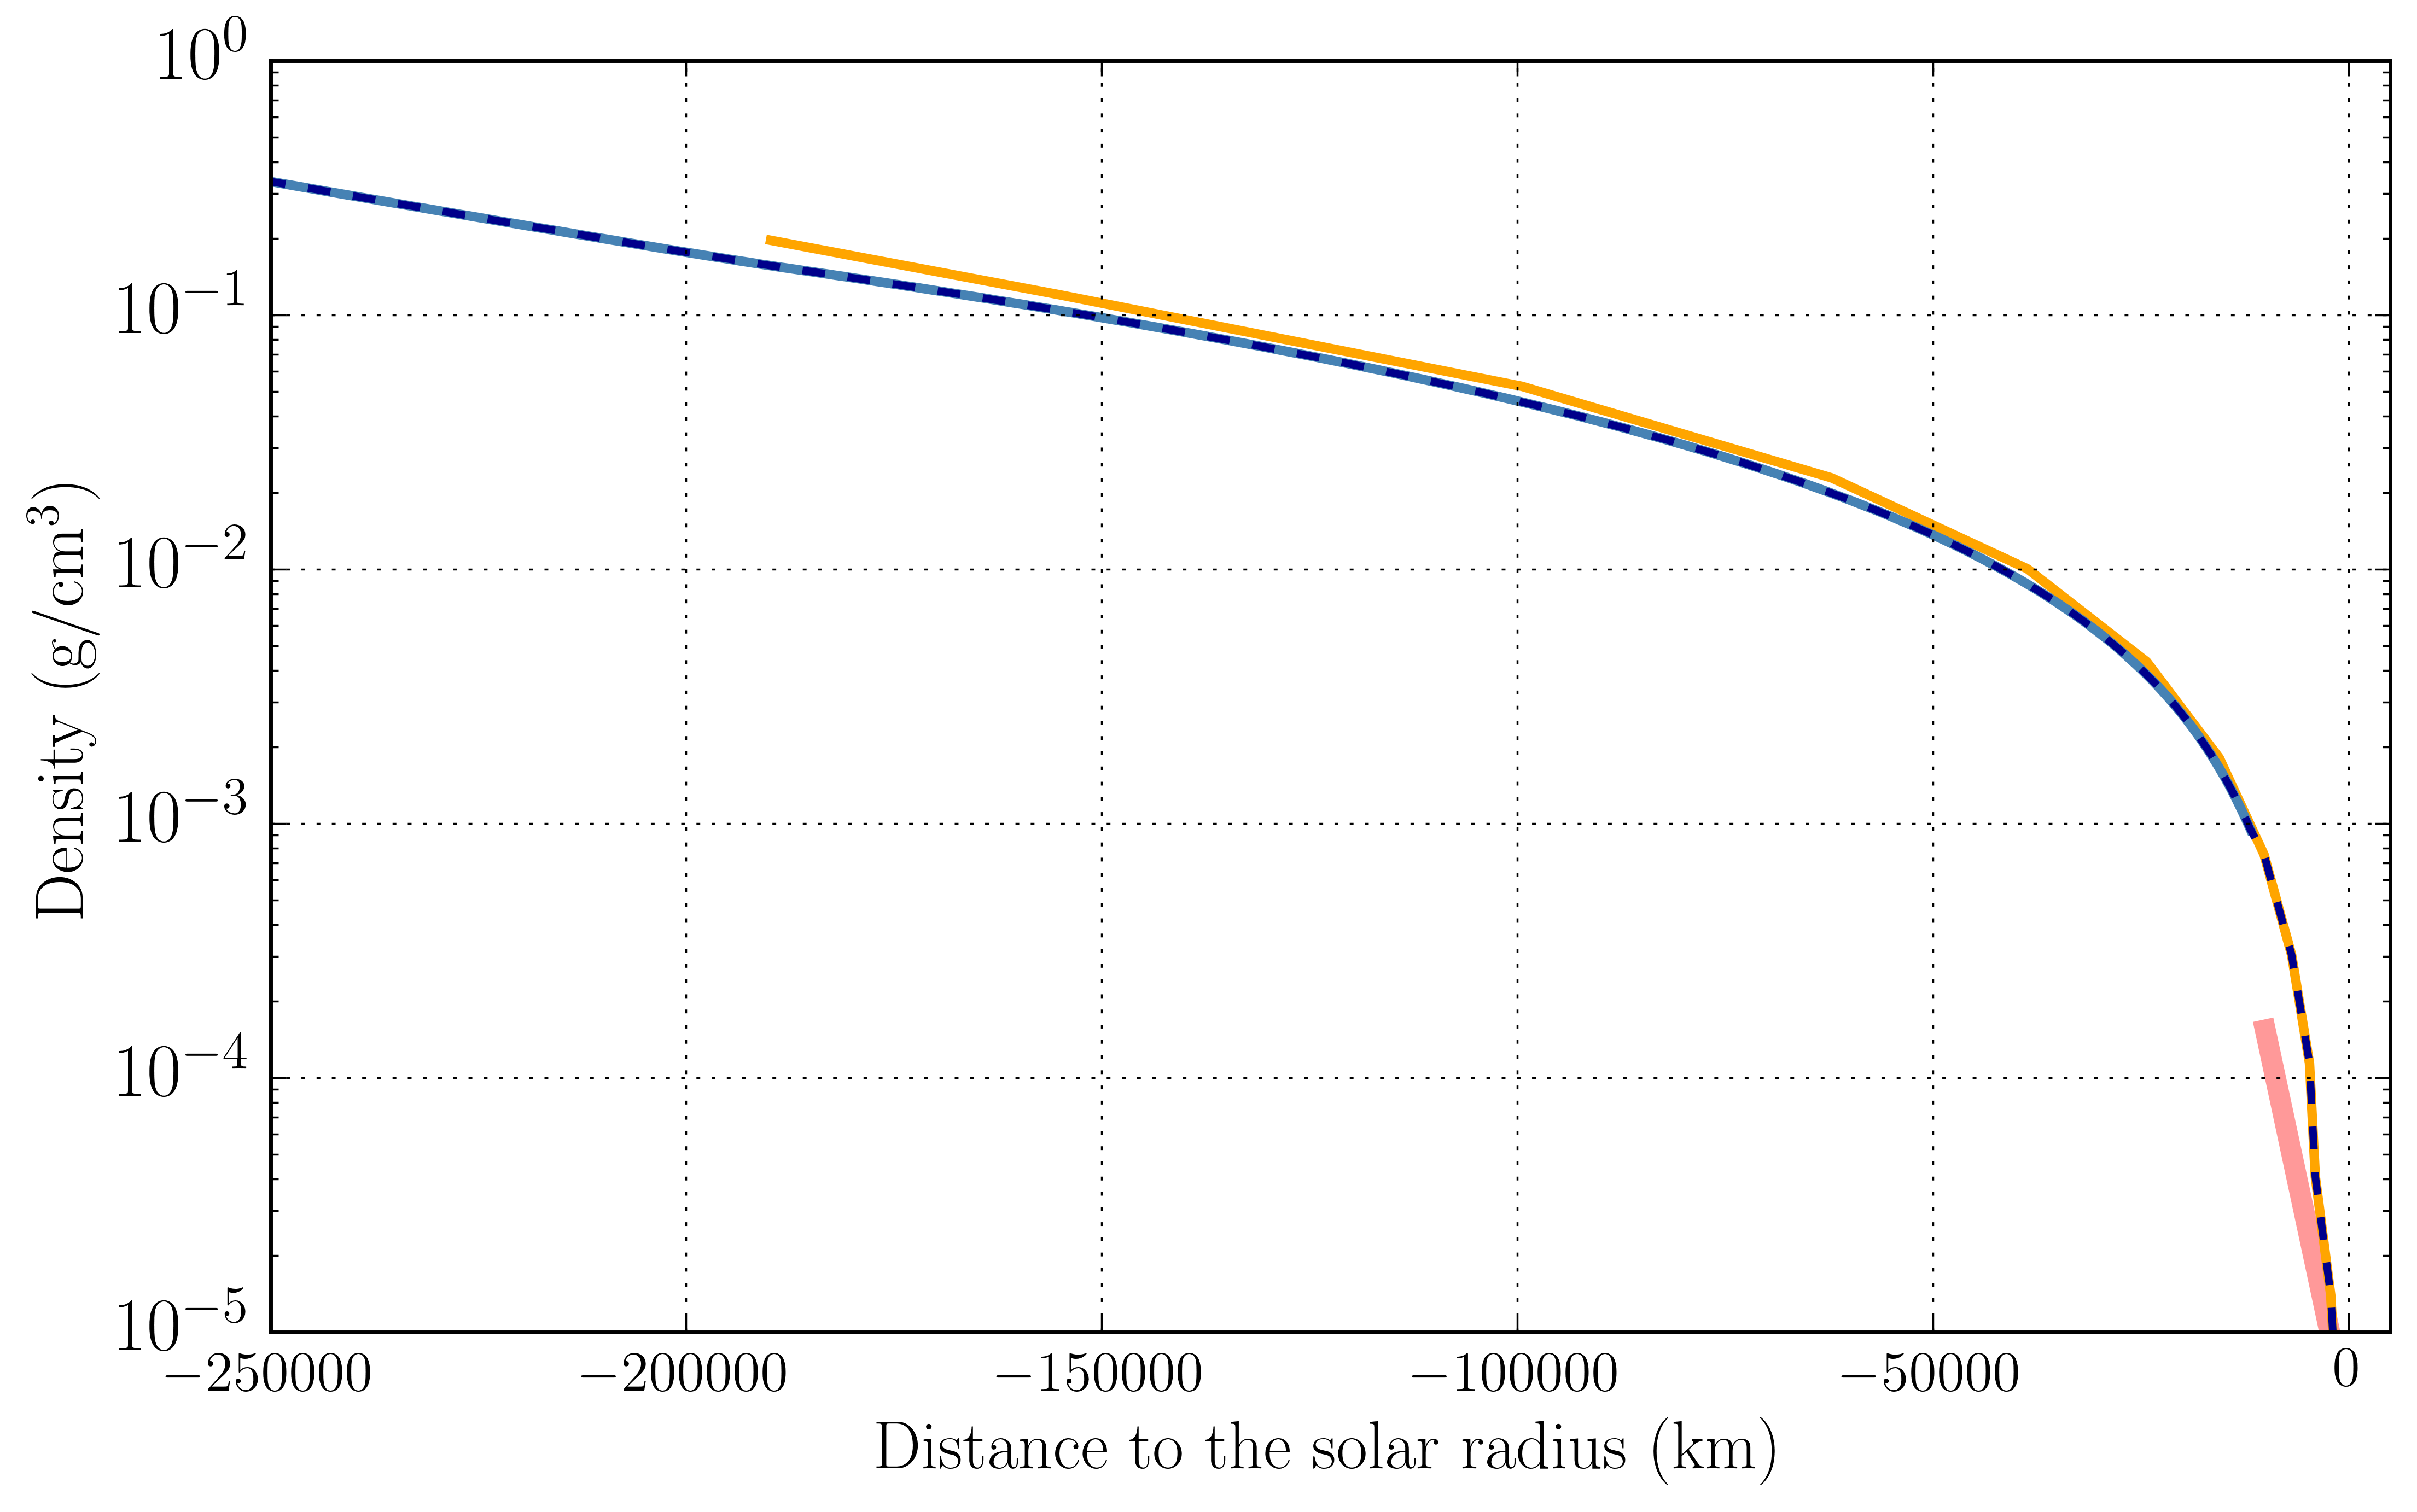

In [24]:
pylab.plot(H,rho_h,'r', linewidth=5.5, label ='Ingelman and Thunman', alpha = 0.4) ### Ingelman and Thunman
pylab.plot(H_ext, rho_h_ext,'r',linewidth=5.5, alpha = 0.4)### Ingelman and Thunman


##plot(H_siess, rho_siess,'black', linewidth=2.5, label = 'Siess')

pylab.plot(H_conv,rho_conv,'orange', linewidth=2.5, label='Convection zone')
pylab.plot(H,rho_hharvard,color='MediumSeaGreen',linestyle='-', linewidth = 1.5, label = 'Harvard-Smithsonian') ### harvard smithsonian
pylab.plot(h_chrom,rho_chrom,'b', markersize=7,linewidth=2.5, color = 'SkyBlue',label ='Fontenla')
#plot(H_bp,rho_bp,'YellowGreen', linewidth = 3.5, label= 'BP2004')
pylab.plot(H_bs05,rho_bs05,'SteelBlue', linewidth = 2.5, label= 'BS05_agsop')
##plot(h_modelC,rhoH_modelC,'r.', markersize=7, label = 'Vernazza')
#plot(H_hybrid, rho_hybrid, 'DarkBlue',linewidth=2,linestyle = '--', label = 'Hybrid')
pylab.plot(H_hybrid_NEW, rho_hybridNEW, 'DarkBlue',linewidth=2,linestyle = '--', label = 'Hybrid')
pylab.xlabel('Distance to the solar radius (km)', size = 18)
pylab.ylabel(r'Density (g/cm$^3$)', size = 18)

pylab.xticks(size=15)
pylab.yticks(size=20)
#pylab.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.)
pylab.grid()
pylab.yscale('log')
v = [ -250000,5000 , 1e-5,  1e0]
pylab.axis(v)
pylab.show()


In [25]:
import matplotlib.pyplot as plt
import matplotlib.text as mtext


class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, r'\underline{' + orig_handle + '}', usetex=True, **self.text_props)
        handlebox.add_artist(title)
        return title



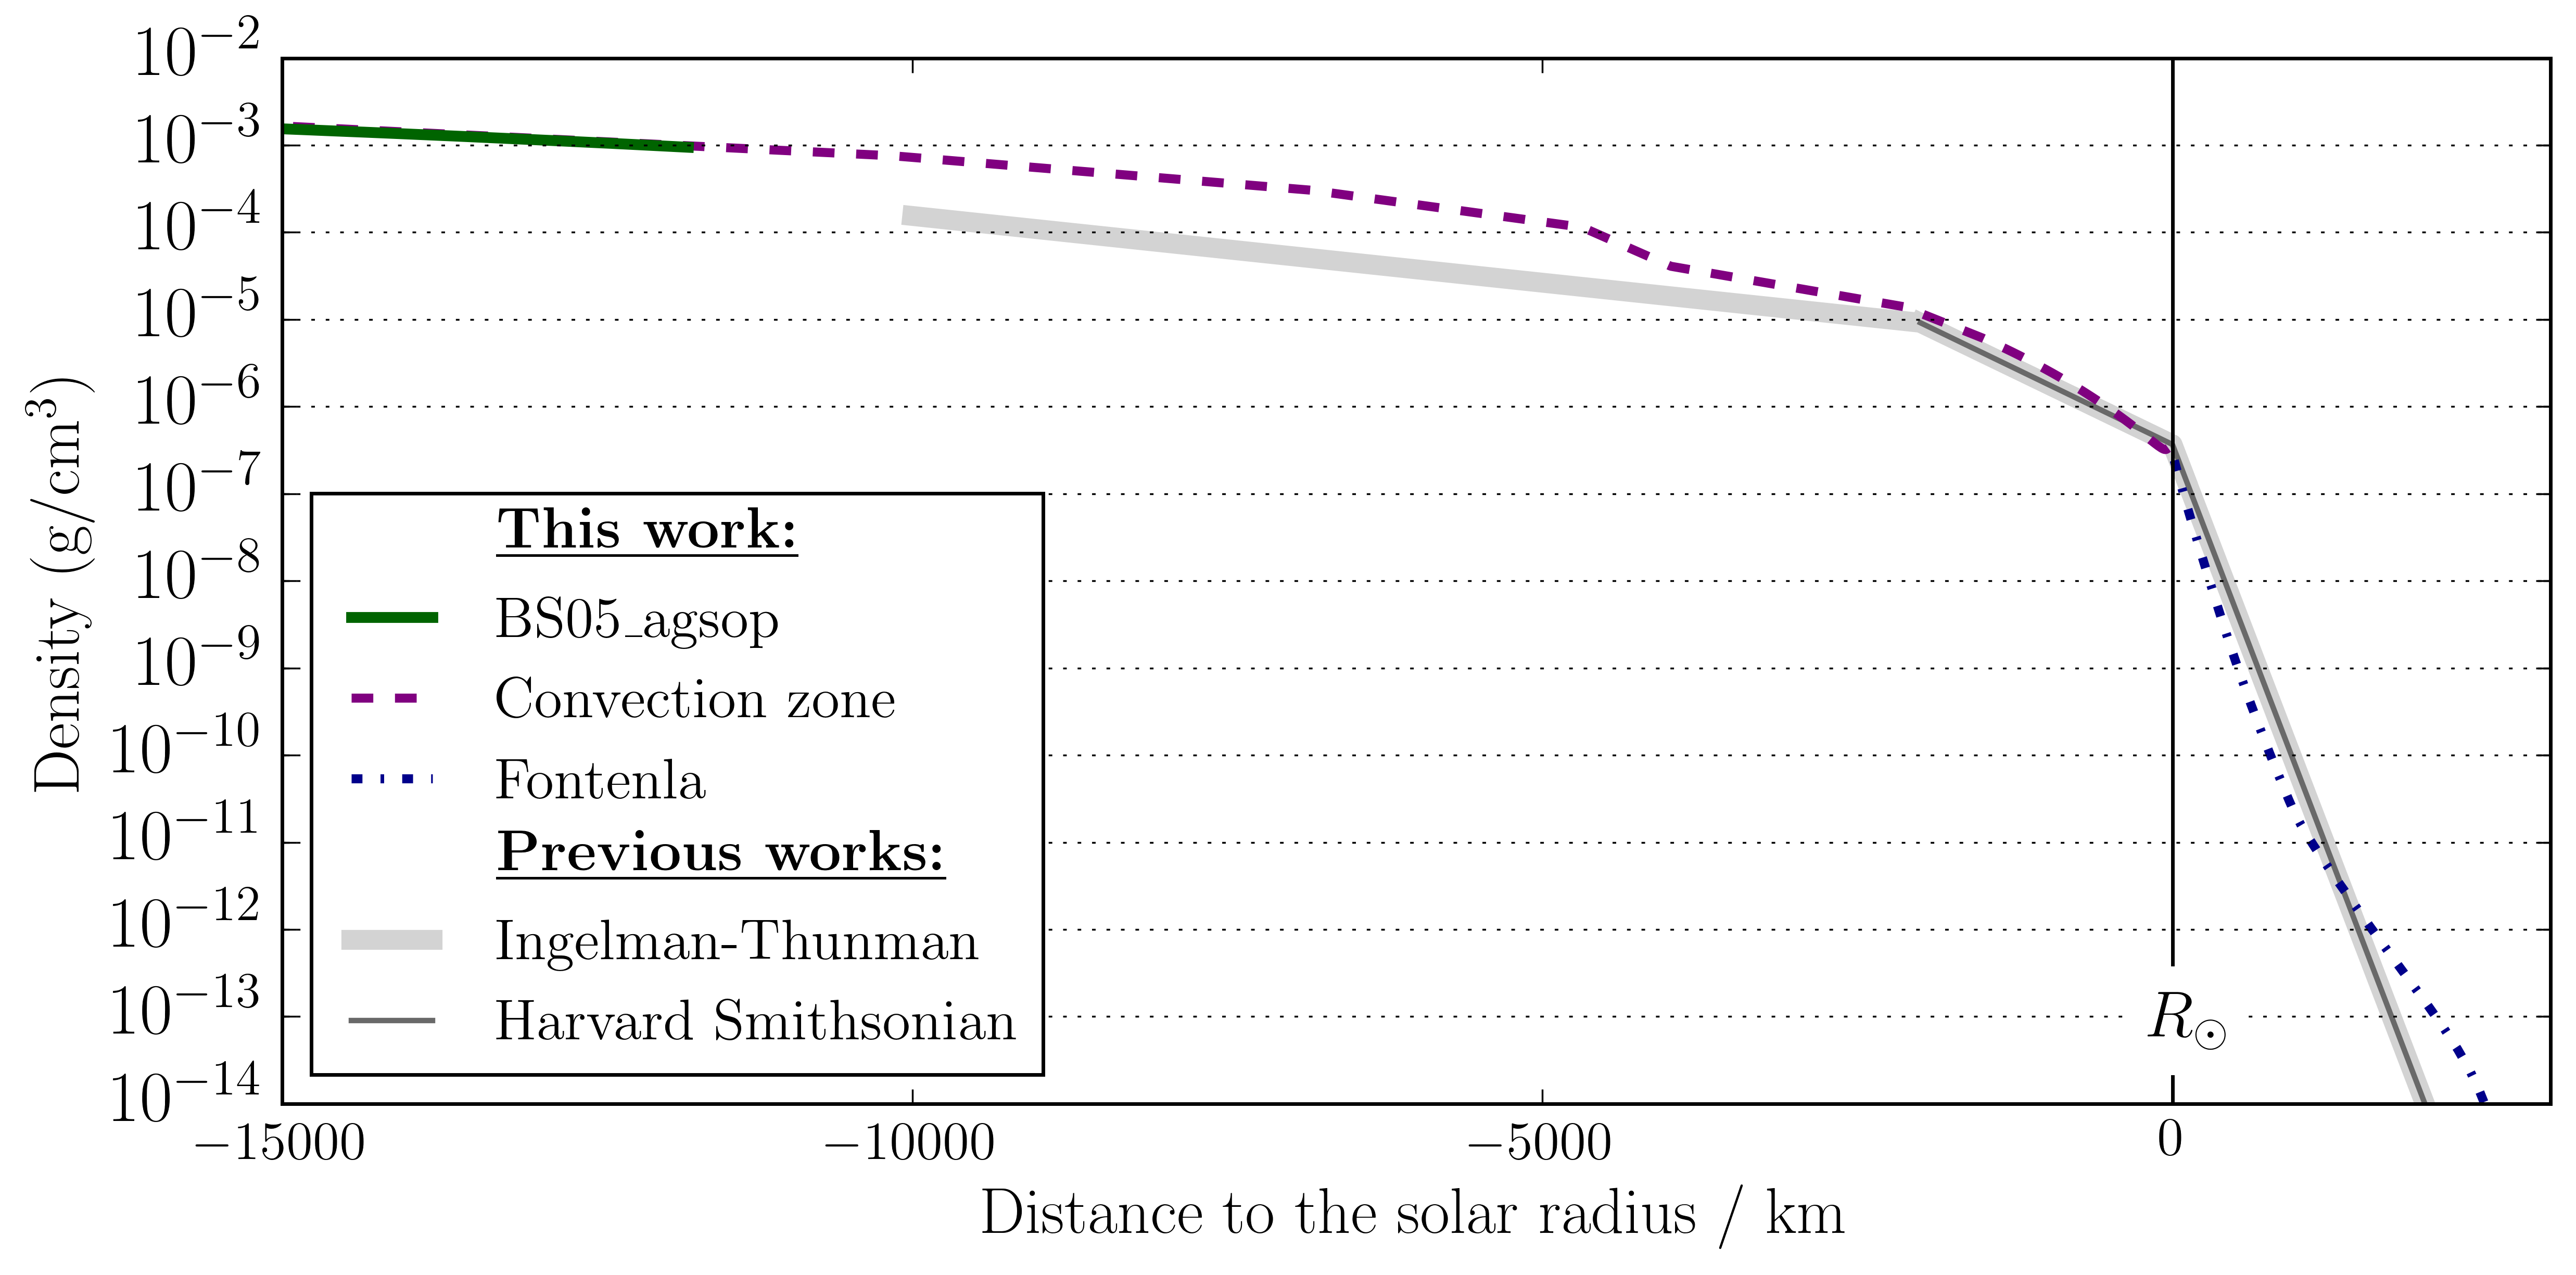

In [26]:

pylab.figure(figsize=(10,5))
ingthunline, = pylab.plot(H,rho_h,'lightgrey', linewidth=5.5, label ='Ingelman and Thunman', alpha = 1) ### Ingelman and Thunman
pylab.plot(H_ext, rho_h_ext,'lightgrey',linewidth=5.5, alpha = 1) ### Ingelman and Thunman
harvline,=pylab.plot(H,rho_hharvard,color='dimgrey',linestyle='-', linewidth = 1.5, label = 'Harvard-Smithsonian') ### harvard smithsonian

##plot(H_siess, rho_siess,'black', linewidth=2.5, label = 'Siess')

convline,=pylab.plot(H_conv,numpy.array(rho_conv),'purple', linewidth=2.5,linestyle='--', label='Convection zone')

fontline,=pylab.plot(h_chrom,numpy.array(rho_chrom)*(numpy.array(h_chrom)>0),'b', markersize=7,linewidth=2.5, color = 'darkblue',linestyle='-.',label ='Fontenla')

##plot(H_bp,rho_bp,'YellowGreen', linewidth = 3.5, label= 'BP2004')
bsline,=pylab.plot(H_bs05,rho_bs05,'darkgreen',linestyle='-', linewidth = 3, label= r'$\rm{BS05\_agsop}$')
##plot(h_modelC,rhoH_modelC,'r.', markersize=7, label = 'Vernazza')
#plot(H_hybrid, rho_hybrid, 'DarkBlue',linewidth=2,linestyle = '--', label = 'Hybrid')
#pylab.plot(H_hybrid_NEW, rho_hybridNEW, 'DarkBlue',linewidth=2,linestyle = '--', label = 'Hybrid')
pylab.xlabel('Distance to the solar radius / km', size = 18)
pylab.ylabel(r'Density (g/cm$^3$)', size = 18)
p5, = pylab.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
pylab.xticks(size=15)
pylab.yticks(size=20)
#legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.)
#pylab.grid()
pylab.semilogy()
pylab.v = [ -2500,1000 , 1e-10,  1e-4]
pylab.plot([0,0],[4e-13,100],color='black')


pylab.text(-200,7e-14,r'$R_\odot$',fontsize=18, va='center', bbox=dict(facecolor='white', edgecolor='white'))
pylab.plot([0,0],[1e-14,1e-13],color='black')


pylab.xlim(-15000,3000)
pylab.ylim(1e-14,1e-2)
plt.legend([p5,bsline,convline,fontline,p5,ingthunline,harvline],[r'\underline{\bf This work:}','BS05\_agsop','  Convection zone','  Fontenla',r'\underline{\bf Previous works:}','  Ingelman-Thunman','  Harvard Smithsonian'],loc='lower left',fontsize=16)
pylab.grid(axis='y')
pylab.tight_layout()
pylab.savefig("DensityZoomDetail.png",bbox_inches=0,dpi=400)
pylab.show()



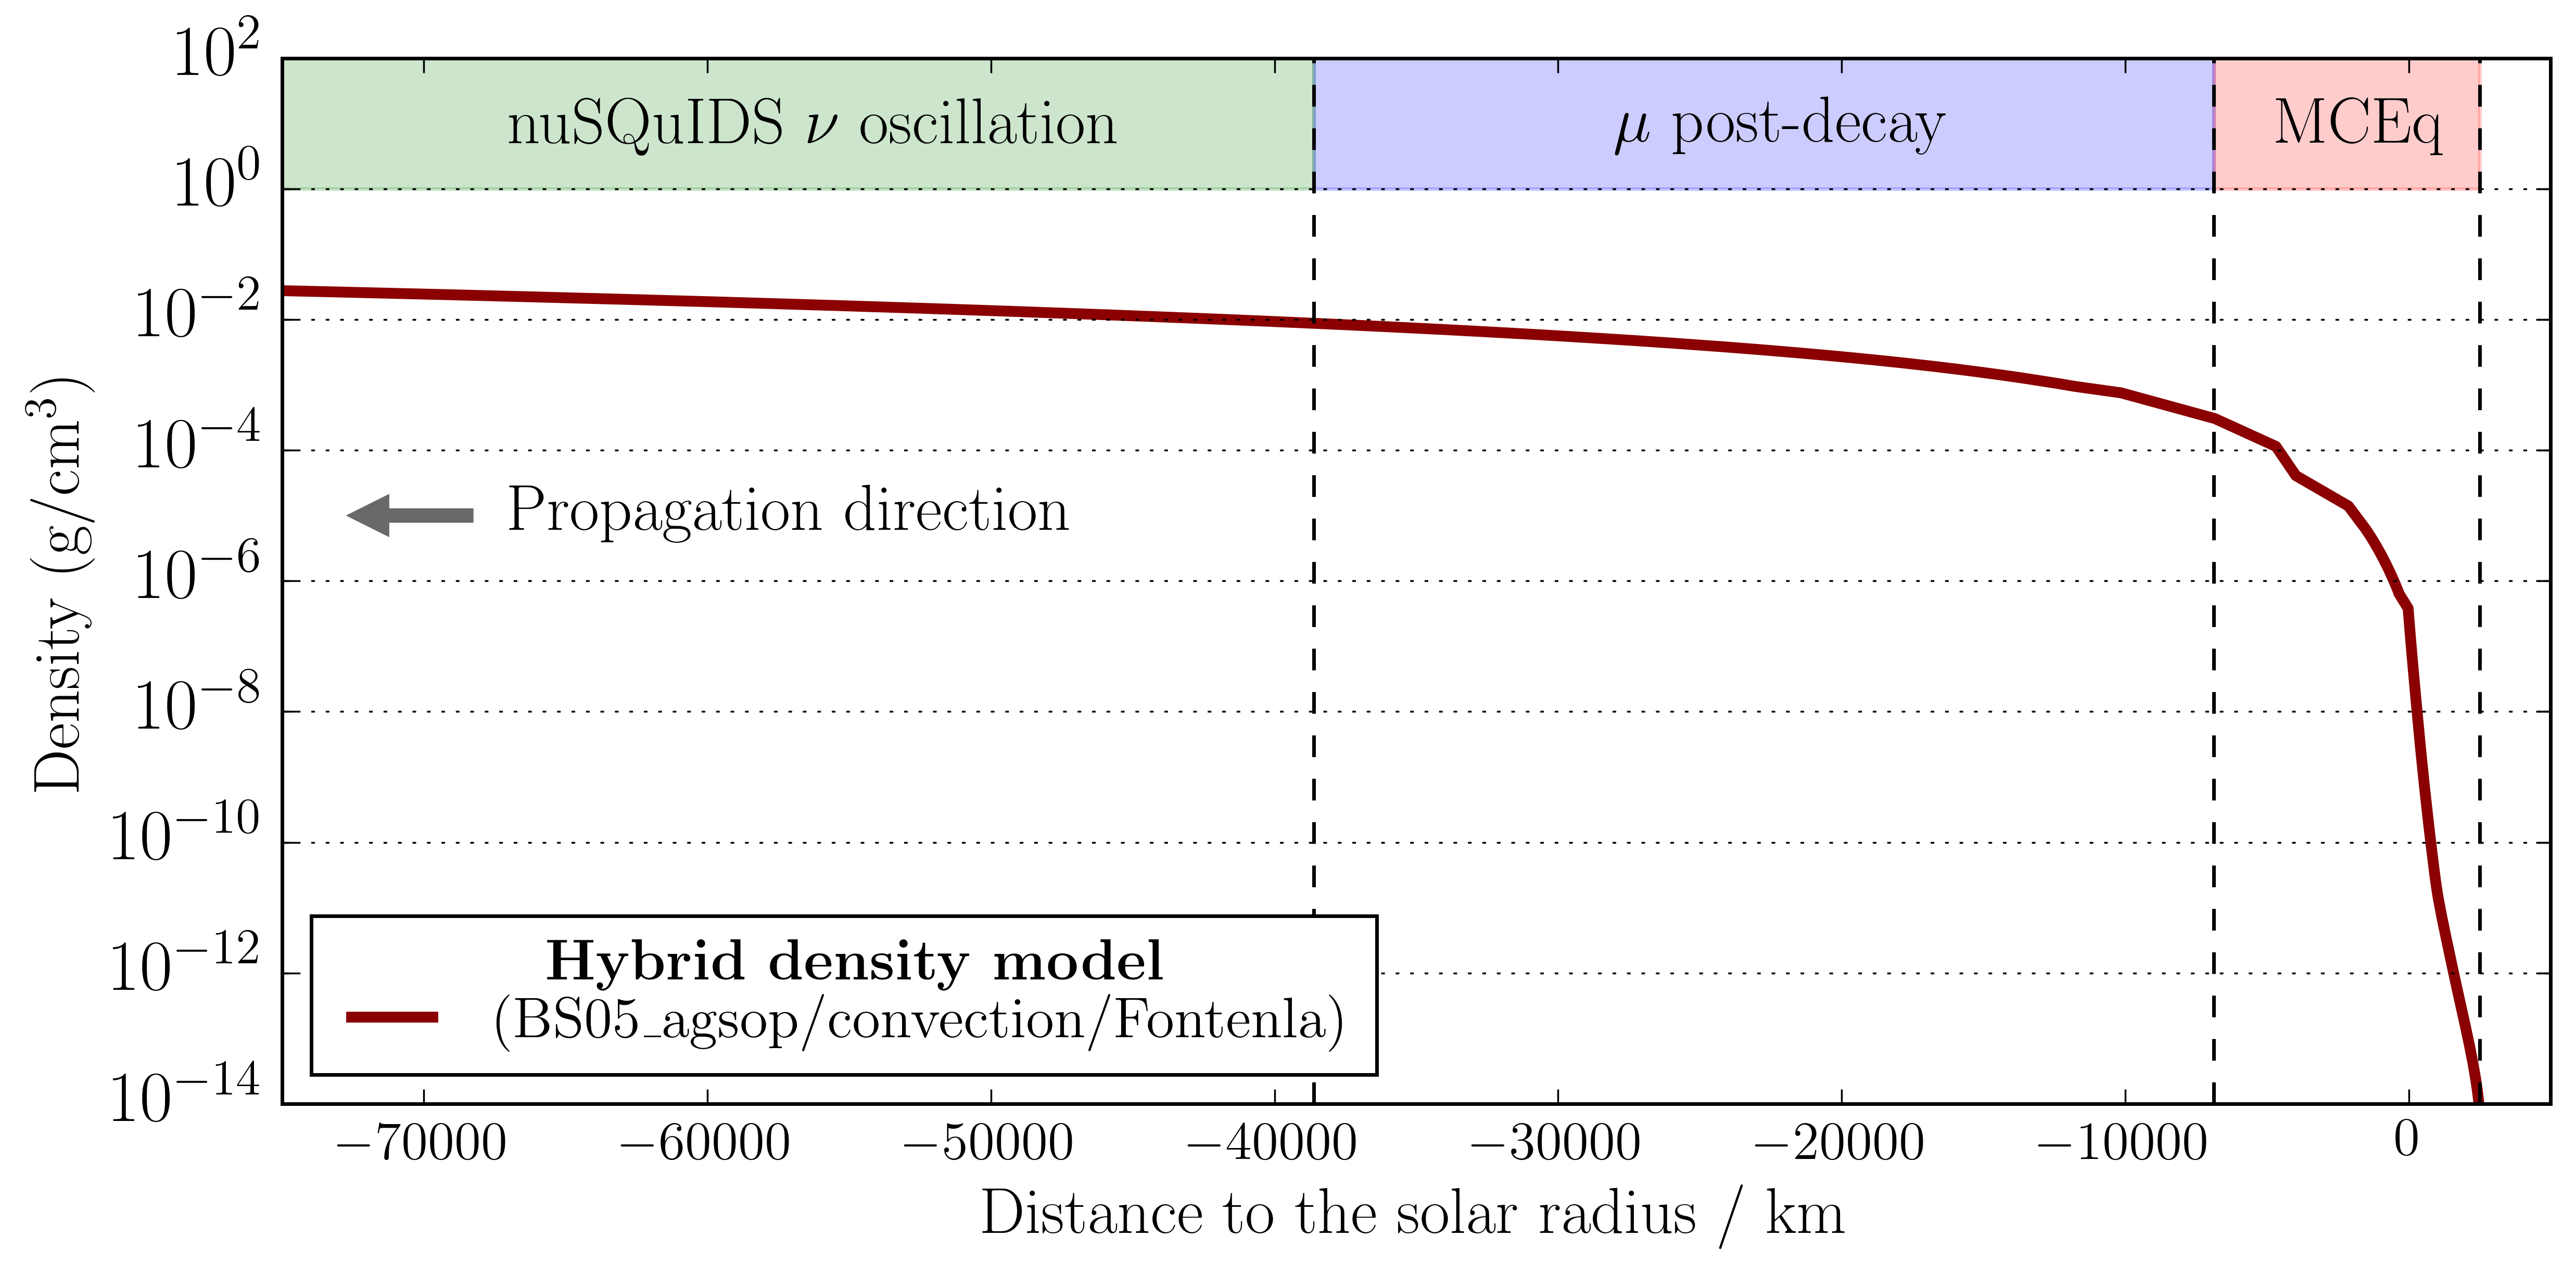

In [27]:

pylab.figure(figsize=(10,5))
#ingthunline, = pylab.plot(H,rho_h,'lightgrey', linewidth=5.5, label ='Ingelman and Thunman', alpha = 1) ### Ingelman and Thunman
#pylab.plot(H_ext, rho_h_ext,'lightgrey',linewidth=5.5, alpha = 1) ### Ingelman and Thunman
#harvline,=pylab.plot(H,rho_hharvard,color='dimgrey',linestyle='-', linewidth = 1.5, label = 'Harvard-Smithsonian') ### harvard smithsonian

##plot(H_siess, rho_siess,'black', linewidth=2.5, label = 'Siess')

#convline,=pylab.plot(H_conv,numpy.array(rho_conv),'darkred', linewidth=2.5,linestyle='--', label='Convection zone')

#fontline,=pylab.plot(h_chrom,numpy.array(rho_chrom)*(numpy.array(h_chrom)>0),'b', markersize=7,linewidth=2.5, color = 'darkblue',linestyle=':',label ='Fontenla')

##plot(H_bp,rho_bp,'YellowGreen', linewidth = 3.5, label= 'BP2004')
#bsline,=pylab.plot(H_bs05,rho_bs05,'darkgreen',linestyle='-', linewidth = 3, label= r'$\rm{BS05\_agsop}$')
##plot(h_modelC,rhoH_modelC,'r.', markersize=7, label = 'Vernazza')
#plot(H_hybrid, rho_hybrid, 'DarkBlue',linewidth=2,linestyle = '--', label = 'Hybrid')
pylab.plot(H_hybrid_NEW, rho_hybridNEW, 'darkred',linewidth=3,linestyle = '-', label = r'\textbf{Hybrid density model}\\  (BS05\_agsop/convection/Fontenla)')
pylab.xlabel('Distance to the solar radius / km', size = 18)
pylab.ylabel(r'Density (g/cm$^3$)', size = 18)

pylab.xticks(size=15)
pylab.yticks(size=20)
#legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.)
#pylab.grid()
pylab.semilogy()
pylab.v = [ -2500,1000 , 1e-10,  1e-4]
pylab.xlim(-75000,5000)
pylab.ylim(1e-14,100)
pylab.plot([2500,2500],[1e-14,100],linestyle='--',color='black',linewidth=1)
pylab.plot([-6873,-6873],[1e-14,100],linestyle='--',color='black',linewidth=1)
pylab.plot([-38610,-38610],[1e-14,100],linestyle='--',color='black',linewidth=1)
#pylab.text(2500,10,"Injection",rotation='270',fontsize=16)
pylab.fill_between([-6873,2500],[1,1],[100,100],color='red',alpha=0.2)
pylab.text(-4700,5,'MCEq',fontsize=18)
pylab.text(-28000,5,r'$\mu$ post-decay',fontsize=18)
pylab.text(-67000,5,r'nuSQuIDS $\nu$ oscillation',fontsize=18)
pylab.fill_between([-38610,-6873],[1,1],[100,100],color='blue',alpha=0.2)
pylab.fill_between([-75000,-38610],[1,1],[100,100],color='green',alpha=0.2)

plt.legend(loc='lower left',fontsize=16)
#pylab.arrow(-66000, 1e-5, 2000, 0, fc='k', ec='k')
pylab.annotate('', xy=(-73000,1e-5), xytext=(-68000, 1e-5),fontsize=18,
            arrowprops=dict(facecolor='dimgrey', shrink=0.05,linewidth=0),
            )
pylab.text(-67000,6e-6,"Propagation direction",fontsize=18)
pylab.grid(axis='y')
pylab.tight_layout()
pylab.savefig("DensityWideView.png",bbox_inches=0,dpi=400)


pylab.show()




## 